%%HTML
<h1 style="font-size:40px" style="font-family:verdana" style="color:#00ffff">Chennai House Price Prediction</h1>
<img src="house.jpg" alt="Chennai House Price Prediction"/>

<h2 style="color:#00ffff" style="font-size:30px">Problem Statement</h2>

<p>1. Real estate transactions are quite opaque sometimes and it may be **difficult for a new buyers** to know the fair price of any given home.</p>
<p>2. multiple real estate websites have the **functionality to predict the prices of houses given different features regarding it**.</p>
<p>3. Such forecasting models will **help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money**.</p>
<p>4. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also **help the sellers understand what factors are fetching more money for the houses?**</p>

# Minimum Requirements

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# Importing all the necessary python packages

In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

In [2]:
## Display all the columns of the dataframe

In [3]:
data = pd.read_csv(r"Chennai houseing sale.csv")
pd.pandas.set_option("display.max_columns", None)

In [4]:
data.head(5)

PRT_ID        AREA  INT_SQFT  YEAR_SALE   DATE_SALE  DIST_MAINROAD  \
0  P03210  Karapakkam      1004       2011  04/05/2011            131   
1  P09411  Anna Nagar      1986       2006  19/12/2006             26   
2  P01812       Adyar       909       2012  04/02/2012             70   
3  P05346   Velachery      1855       2010  13/03/2010             14   
4  P06210  Karapakkam      1226       2009  05/10/2009             84   

   N_BEDROOM  N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  YEAR_BUILD  DATE_BUILD  \
0        1.0         1.0       3  AbNormal        Yes        1967  15/05/1967   
1        2.0         1.0       5  AbNormal         No        1995  22/12/1995   
2        1.0         1.0       3  AbNormal        Yes        1992  09/02/1992   
3        3.0         2.0       5    Family         No        1988  18/03/1988   
4        1.0         1.0       3  AbNormal        Yes        1979  13/10/1979   

    BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0  Commercial        AllPub   Paved      A       4.0          3.9         4.9   
1  Commercial        AllPub  Gravel     RH       4.9          4.2         2.5   
2  Commercial           ELO  Gravel     RL       4.1          3.8         2.2   
3      Others       NoSewr    Paved      I       4.7          3.9         3.6   
4      Others        AllPub  Gravel      C       3.0          2.5         4.1   

   QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0        4.33   380000  144400      7600000  
1        3.77   760122  304049     21717770  
2        3.09   421094   92114     13159200  
3        4.01   356321   77042      9630290  
4        3.29   237000   74063      7406250

In [5]:
data.shape

(7109, 24)

In [6]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'YEAR_SALE', 'DATE_SALE', 'DIST_MAINROAD',
       'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'YEAR_BUILD', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   YEAR_SALE      7109 non-null   int64  
 4   DATE_SALE      7109 non-null   object 
 5   DIST_MAINROAD  7109 non-null   int64  
 6   N_BEDROOM      7108 non-null   float64
 7   N_BATHROOM     7104 non-null   float64
 8   N_ROOM         7109 non-null   int64  
 9   SALE_COND      7109 non-null   object 
 10  PARK_FACIL     7109 non-null   object 
 11  YEAR_BUILD     7109 non-null   int64  
 12  DATE_BUILD     7109 non-null   object 
 13  BUILDTYPE      7109 non-null   object 
 14  UTILITY_AVAIL  7109 non-null   object 
 15  STREET         7109 non-null   object 
 16  MZZONE         7109 non-null   object 
 17  QS_ROOMS       7109 non-null   float64
 18  QS_BATHR

# Data Cleaning

In [8]:
print("Id of Houses {}".format(len(data.PRT_ID)))

Id of Houses 7109


In [9]:
##we will check the percentage of nan values present in each feature

features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, data[feature].isnull().sum(),  '  missing values')

N_BATHROOM 5   missing values
QS_OVERALL 48   missing values


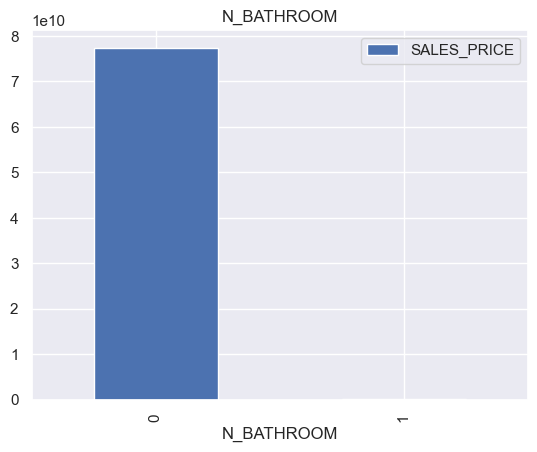

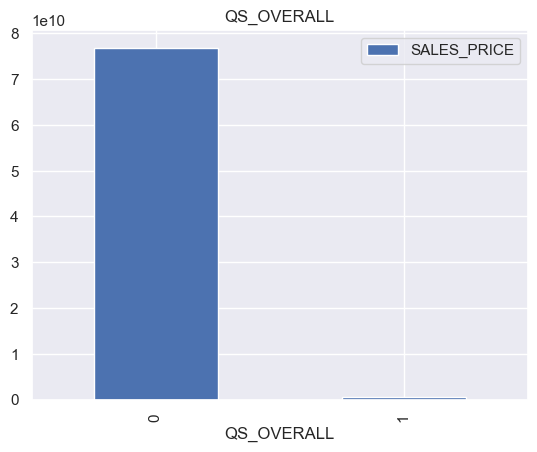

In [10]:
for feature in features_with_na:
    data1 = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data1[feature] = np.where(data1[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data1.groupby(feature)['SALES_PRICE'].sum().plot.bar()
    plt.title(feature)
    plt.legend()
    plt.show()

<p>Since they are less missing values, we need to find the relationship between missing values and Sales Price
Let's plot some diagram for this relationship</p>

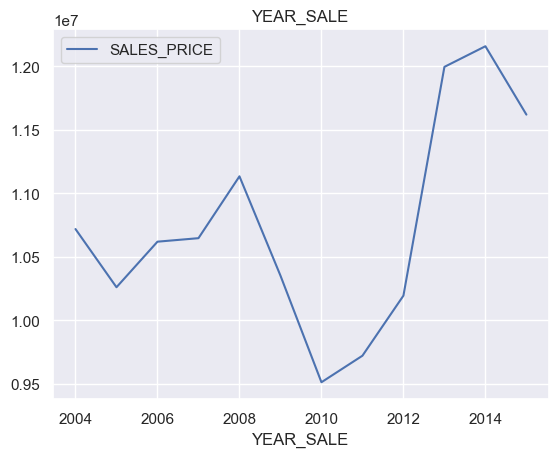

In [11]:
data1.groupby("YEAR_SALE")['SALES_PRICE'].median().plot()
plt.title("YEAR_SALE")
plt.legend()
plt.show()

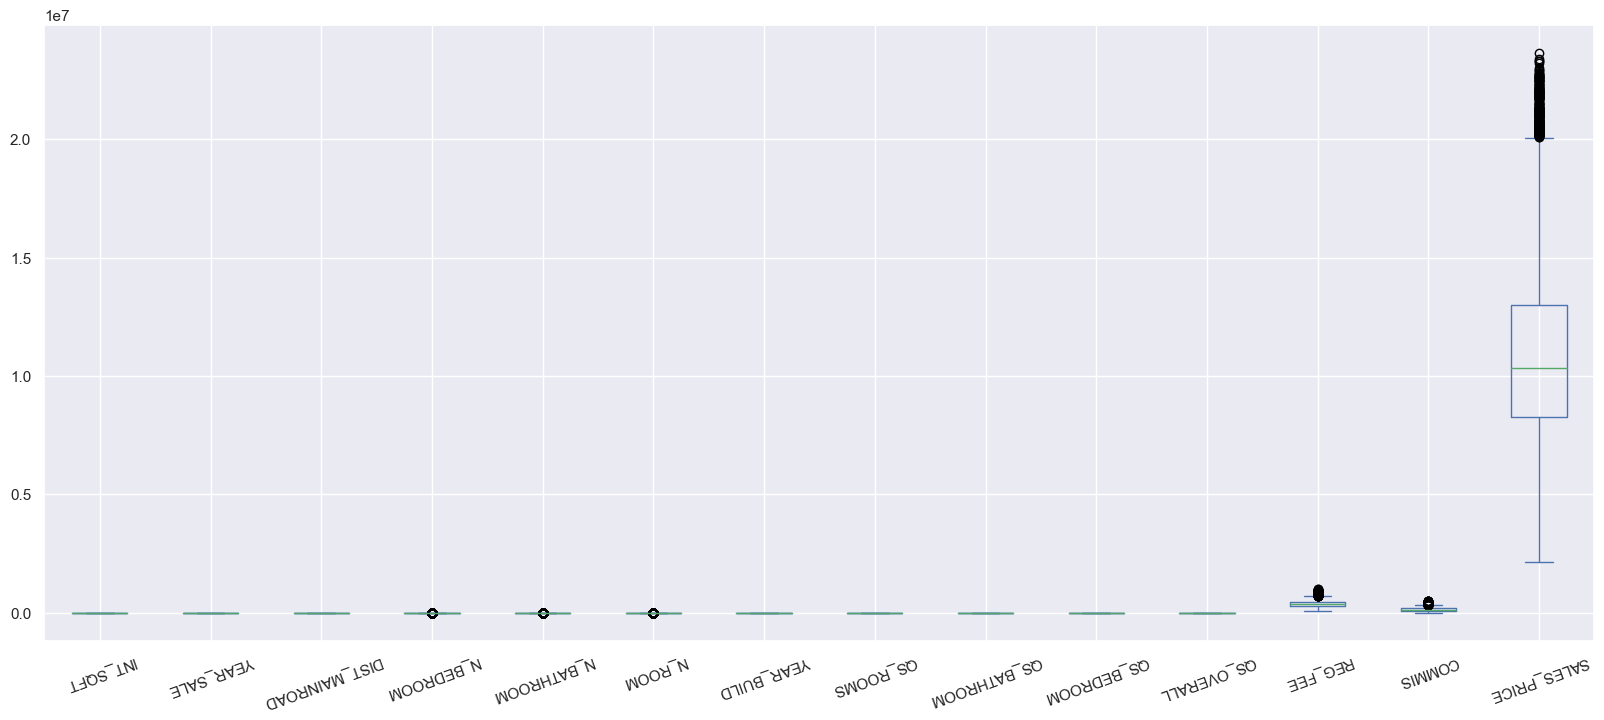

In [12]:
pd.DataFrame(data, columns=data.columns).plot.box(figsize=(20,8), rot=200)
plt.show()

In [13]:
# Removing all the null values
data.dropna(inplace=True)

In [14]:
# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()

In [15]:
# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

In [16]:
# Correcting the spelling mistakes in area columns
data.area = data.area.replace({'velchery':'velachery', 
                               'kknagar':'kk nagar', 
                               'tnagar':'t nagar', 
                               'chormpet':'chrompet', 
                               'chrompt':'chrompet', 
                               'chrmpet':'chrompet', 
                               'ana nagar':'anna nagar', 
                               'ann nagar':'anna nagar',
                               'karapakam':'karapakkam', 
                               'adyr':'adyar'})

In [17]:
# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

In [18]:
# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normalsale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})

In [19]:
# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

In [20]:
# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.replace({'noo':'no'})

In [21]:
# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

In [22]:
# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.replace({'comercial':'commercial', 'others':'other'})

In [23]:
# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

In [24]:
# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.replace({'all pub':'allpub', 'nosewr':'nosewa'})

In [25]:
# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

In [26]:
# Correcting the spelling mistakes in street columns
data.street = data.street.replace({'pavd':'paved', 'noaccess':'no access'})

In [27]:
# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

In [28]:
# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

In [29]:
# Creating property_age column which deternine how old the property id
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

In [30]:
# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
data['total_price'] = pd.DataFrame(data.reg_fee + data.commis + data.sales_price)

In [31]:
# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])

In [32]:
data.head(5)

prt_id        area sale_cond park_facil   buildtype utility_avail  street  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   paved   
1  P09411  anna nagar  abnormal         no  commercial        allpub  gravel   
2  P01812       adyar  abnormal        yes  commercial           elo  gravel   
3  P05346   velachery    family         no       other       nosewr    paved   
4  P06210  karapakkam  abnormal        yes       other        allpub  gravel   

  mzzone  date_build   date_sale  property_age  int_sqft  dist_mainroad  \
0      a  15/05/1967  04/05/2011            44      1004            131   
1     rh  22/12/1995  19/12/2006            11      1986             26   
2     rl  09/02/1992  04/02/2012            20       909             70   
3      i  18/03/1988  13/03/2010            22      1855             14   
4      c  13/10/1979  05/10/2009            30      1226             84   

   n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  \
0          1           1       3       4.0          3.9         4.9   
1          2           1       5       4.9          4.2         2.5   
2          1           1       3       4.1          3.8         2.2   
3          3           2       5       4.7          3.9         3.6   
4          1           1       3       3.0          2.5         4.1   

   qs_overall  reg_fee  commis  sales_price  total_price  
0        4.33   380000  144400      7600000      8124400  
1        3.77   760122  304049     21717770     22781941  
2        3.09   421094   92114     13159200     13672408  
3        4.01   356321   77042      9630290     10063653  
4        3.29   237000   74063      7406250      7717313

In [33]:
#what are the buildtype present in data set

build_type = data.groupby("buildtype")["area"].agg("count").reset_index(name="count")
build_type = build_type.sort_values(by="count", ascending=False)
build_type

buildtype  count
1       house   2433
2       other   2312
0  commercial   2311

In [34]:
#what are the area present in data set
#data.groupby("area")["area"].agg("count")

area_house = data.groupby("area")["area"].agg("count").reset_index(name="count")
area_house = area_house.sort_values(by="count", ascending=False)
area_house

area  count
2    chrompet   1691
3  karapakkam   1359
4    kk nagar    990
6   velachery    975
1  anna nagar    777
0       adyar    769
5     t nagar    495

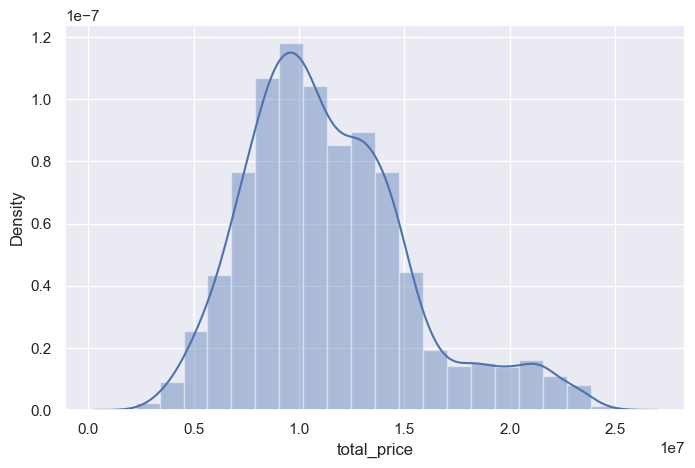

In [35]:
sns.set(rc={"figure.figsize":(8,5)})
sns.distplot(data["total_price"], bins= 20);

* my sale price normaly distributed and right tail

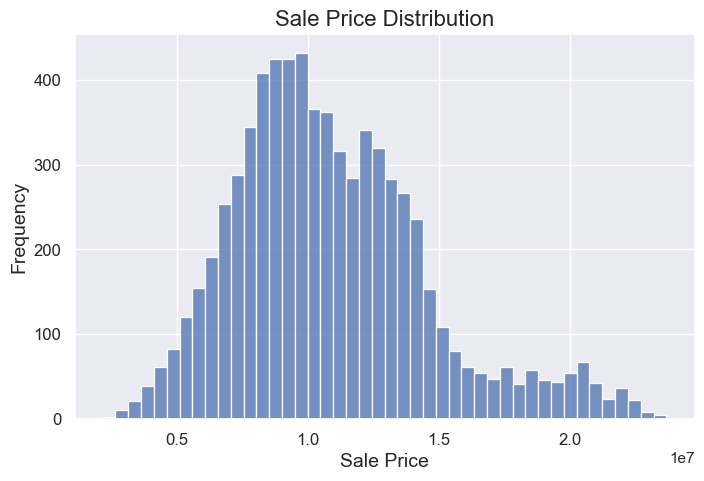

In [36]:
sns.histplot(data['sales_price'], color = 'b')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [37]:
#checking all the numerical colums present in the dataframe

numerical_features = [features for features in data.columns if data[features].dtypes != 'O']
print("Number of numeric variables: ",len(numerical_features))
data[numerical_features].head()

Number of numeric variables:  14


property_age  int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0            44      1004            131          1           1       3   
1            11      1986             26          2           1       5   
2            20       909             70          1           1       3   
3            22      1855             14          3           2       5   
4            30      1226             84          1           1       3   

   qs_rooms  qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  \
0       4.0          3.9         4.9        4.33   380000  144400   
1       4.9          4.2         2.5        3.77   760122  304049   
2       4.1          3.8         2.2        3.09   421094   92114   
3       4.7          3.9         3.6        4.01   356321   77042   
4       3.0          2.5         4.1        3.29   237000   74063   

   sales_price  total_price  
0      7600000      8124400  
1     21717770     22781941  
2     13159200     13672408  
3      9630290     10063653  
4      7406250      7717313

[]


Text(0.5, 1.0, 'House Price vs YearSold')

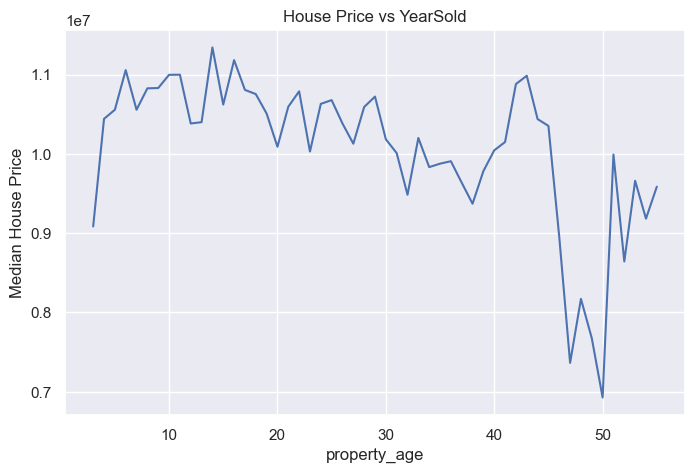

In [38]:
#checking the columns which contains year information to predict their impacts

year_features = [features for features in numerical_features if 'date_build' in features or 'date_sale' in features]
print(year_features)
data.groupby('property_age')['sales_price'].median().plot()
plt.xlabel('property_age')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

In [39]:
data["total_price"].describe()

count    7.056000e+03
mean     1.140579e+07
std      3.945567e+06
min      2.253935e+06
25%      8.639780e+06
50%      1.080447e+07
75%      1.360245e+07
max      2.496904e+07
Name: total_price, dtype: float64

In [40]:
data["property_age"].describe()

count    7056.000000
mean       24.273526
std        12.331565
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: property_age, dtype: float64

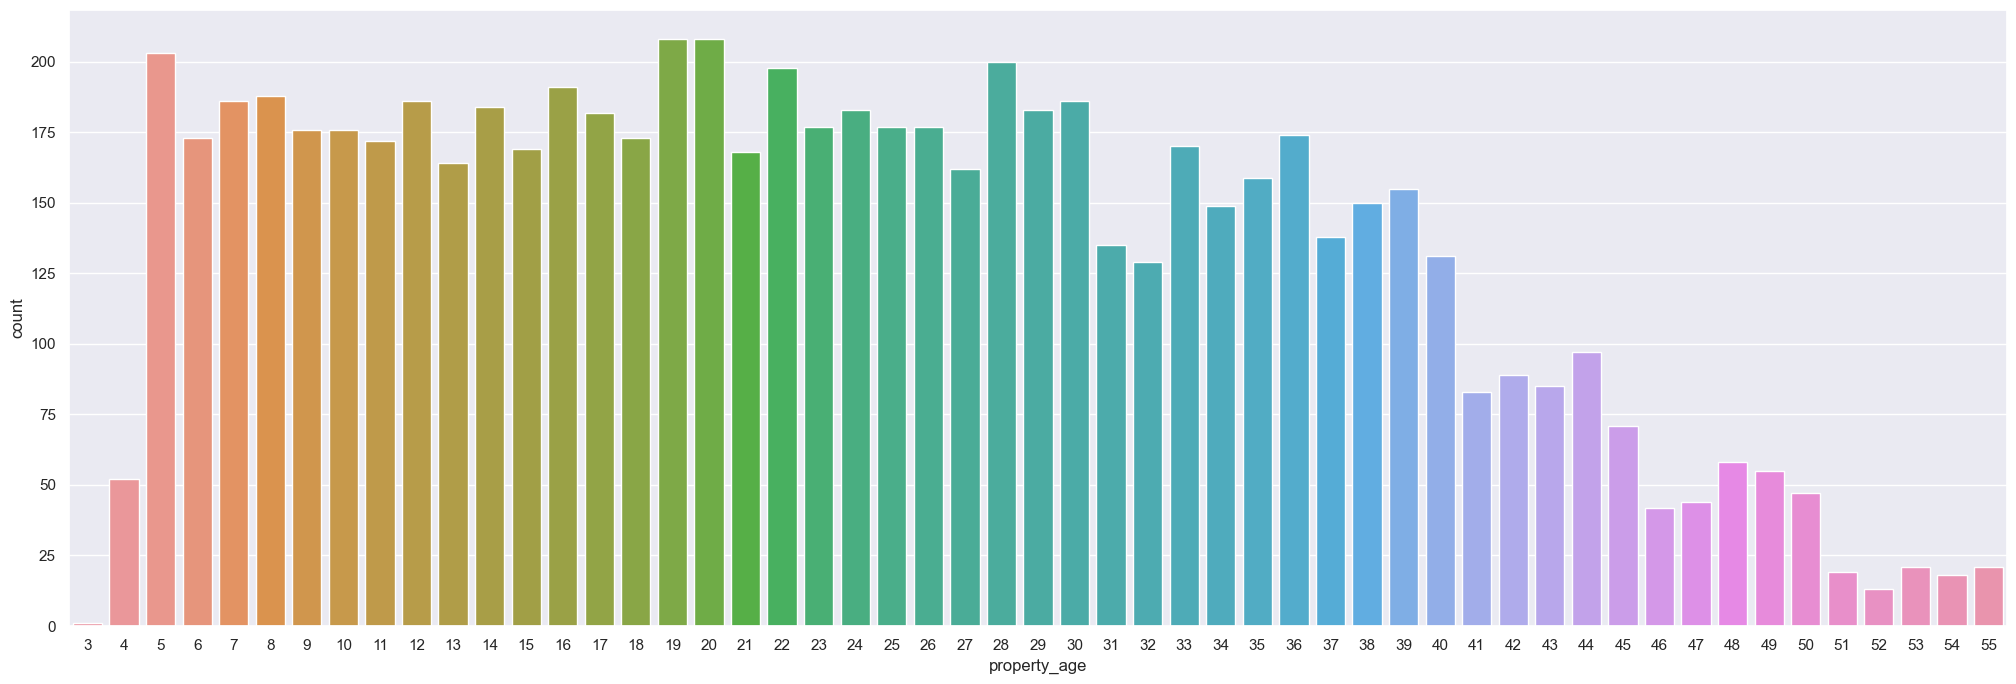

In [41]:
sns.set(rc={"figure.figsize":(25,8)})
sns.countplot(data["property_age"], data=data);

In [42]:
data.shape

(7056, 24)

In [43]:
first_quartile = data["total_price"].quantile(.25)
third_quartile = data["total_price"].quantile(.75)
IQR = third_quartile - first_quartile

In [44]:
new_boundary = third_quartile + 3*IQR

In [45]:
data.drop(data[data["total_price"]>new_boundary].index, axis = 0, inplace=True)

In [46]:
data.shape

(7056, 24)

# Exploratory Data Analysis

In [47]:
data["n_room"].unique()

array([3, 5, 4, 2, 6], dtype=int64)

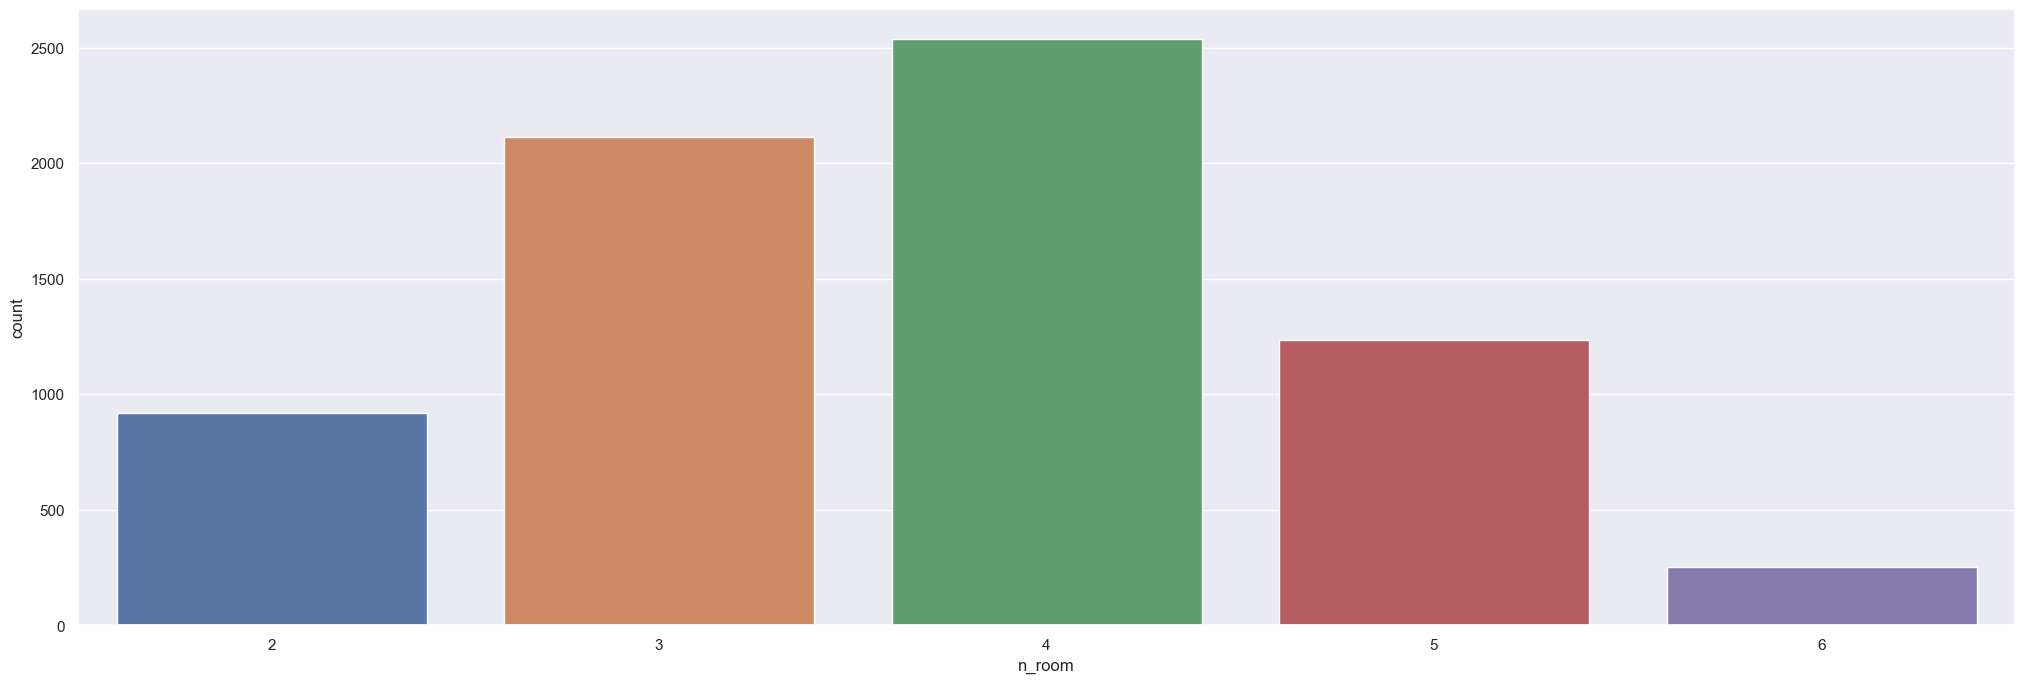

In [48]:
sns.set(rc={"figure.figsize":(25,8)})
sns.countplot(data["n_room"], data=data);

[Text(0, 0, '6.9008e+06'),
 Text(0, 0, '9.04772e+06'),
 Text(0, 0, '1.12209e+07'),
 Text(0, 0, '1.34841e+07'),
 Text(0, 0, '1.3122e+07')]

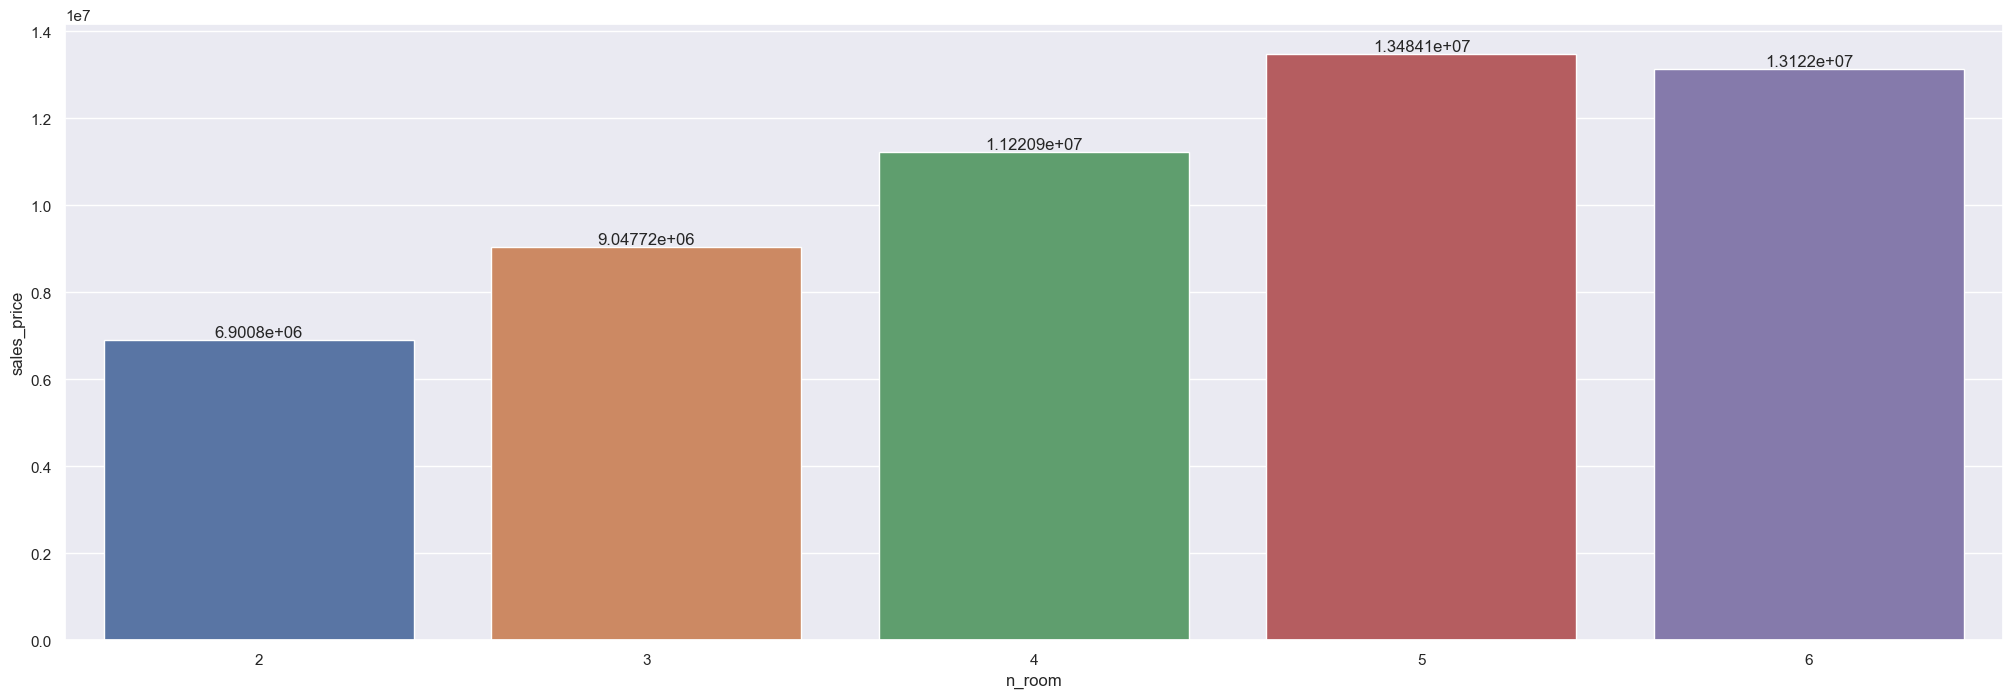

In [49]:
groupedvalues = data.groupby('n_room').median().reset_index()
 
n_room = sns.barplot(x='n_room', y='sales_price', data=groupedvalues, errwidth=0)
 
n_room.bar_label(n_room.containers[0])

#### observation:
    * The average cost increase when comparing 3 room house prices to 2 room house prices is 30%.
    * The average cost increase when comparing 4 room house prices to 3 room house prices is 24%.
    * The average cost increase when comparing 5 room house prices to 4 room house prices is 19%.
    * The average cost increase when comparing 6 room house prices to 5 room house prices is not significant.
    

In [50]:
data["n_bedroom"].unique()

array([1, 2, 3, 4])

<AxesSubplot:xlabel='n_bedroom', ylabel='count'>

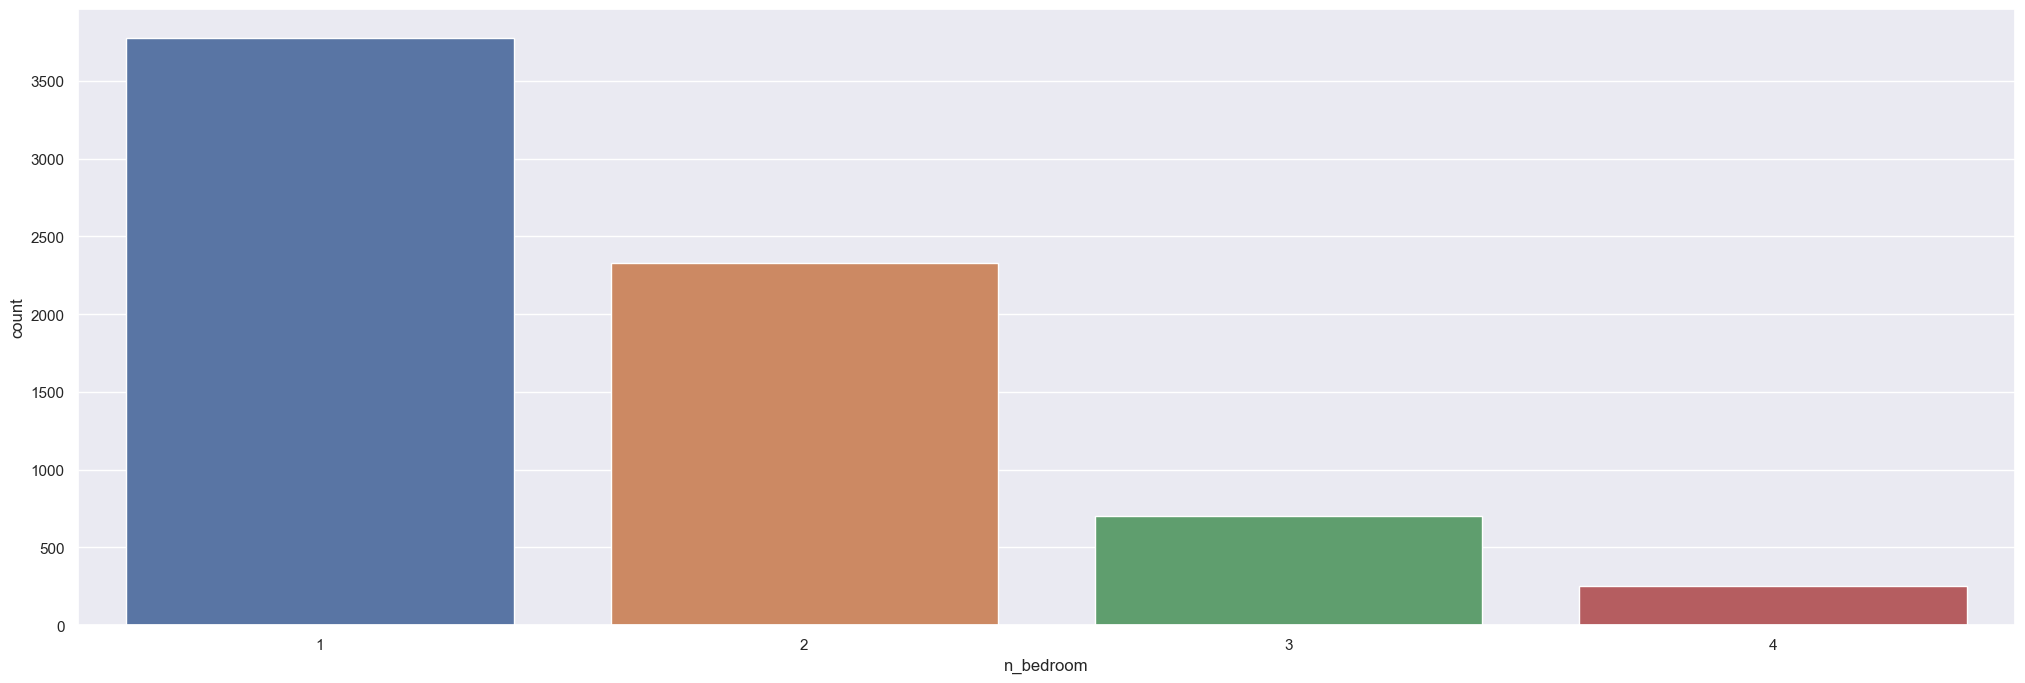

In [51]:
sns.set(rc={"figure.figsize":(25,8)})
sns.countplot(data["n_bedroom"], data=data)

[Text(0, 0, '9.16058e+06'),
 Text(0, 0, '1.09948e+07'),
 Text(0, 0, '1.16679e+07'),
 Text(0, 0, '1.3122e+07')]

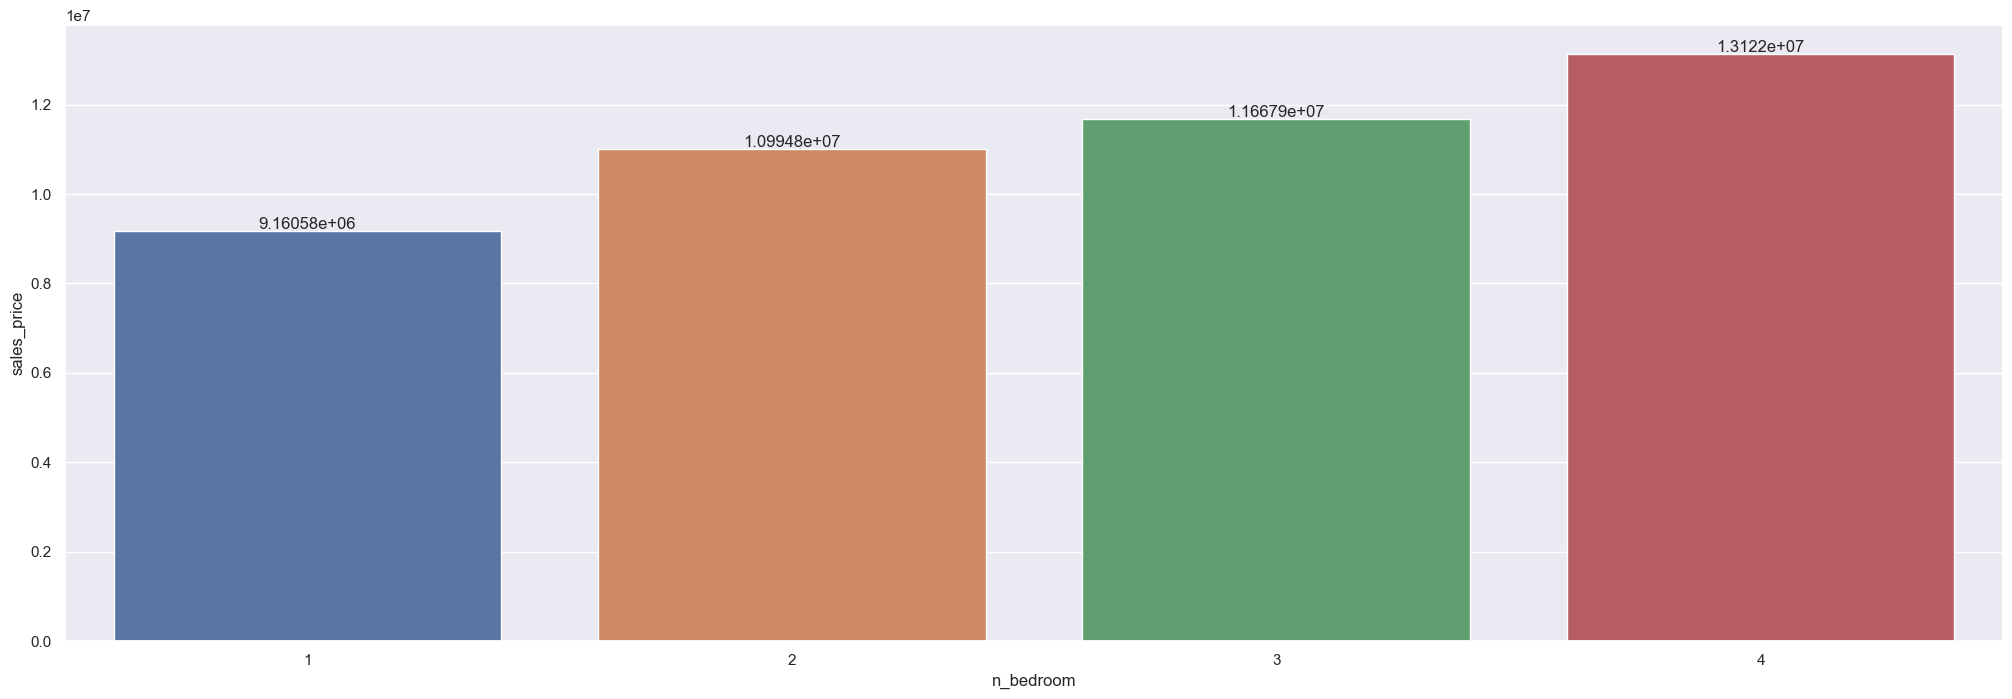

In [52]:
groupedvalues = data.groupby('n_bedroom').median().reset_index()
 
n_bedroom = sns.barplot(x='n_bedroom', y='sales_price', data=groupedvalues, errwidth=0)
 
n_bedroom.bar_label(n_bedroom.containers[0])

#### observation:

* The average cost increase when comparing 2 bedroom house prices to 1 bedroom house prices is 19%.
* The average cost increase when comparing 3 bedroom house prices to 2 bedroom house prices is 6%.
* The average cost increase when comparing 4 bedroom house prices to 3 bedroom house prices is 12%.

[Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6')]

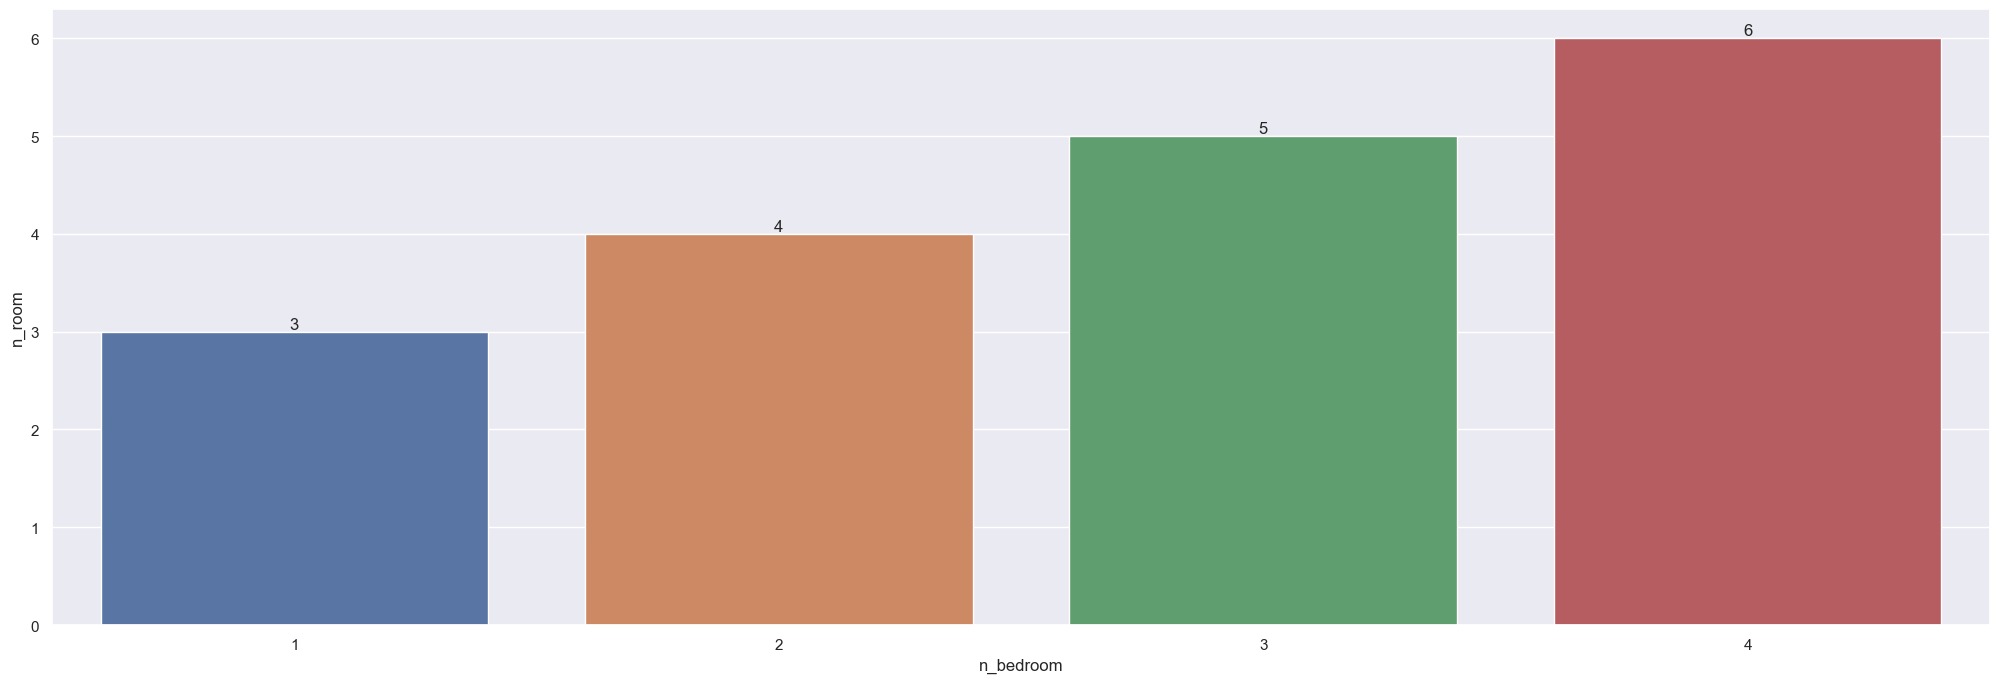

In [53]:
groupedvalues = data.groupby('n_bedroom').median().reset_index()
 
n_bedroom = sns.barplot(x='n_bedroom', y='n_room', data=groupedvalues, errwidth=0)
 
n_bedroom.bar_label(n_bedroom.containers[0])

#### observation:

    * When comparing 3 rooms in a house, at least 1 bedroom must be present.
    * When comparing 4 rooms in a house, at least 2 bedroom is the most present.
    * When comparing 5 rooms in a house, at least 3 bedroom is the most present.
    * When comparing 6 rooms in a house, at least 4 bedroom is the most present.
    



In [54]:
data["n_bathroom"].unique()

array([1, 2])

<AxesSubplot:xlabel='n_bathroom', ylabel='count'>

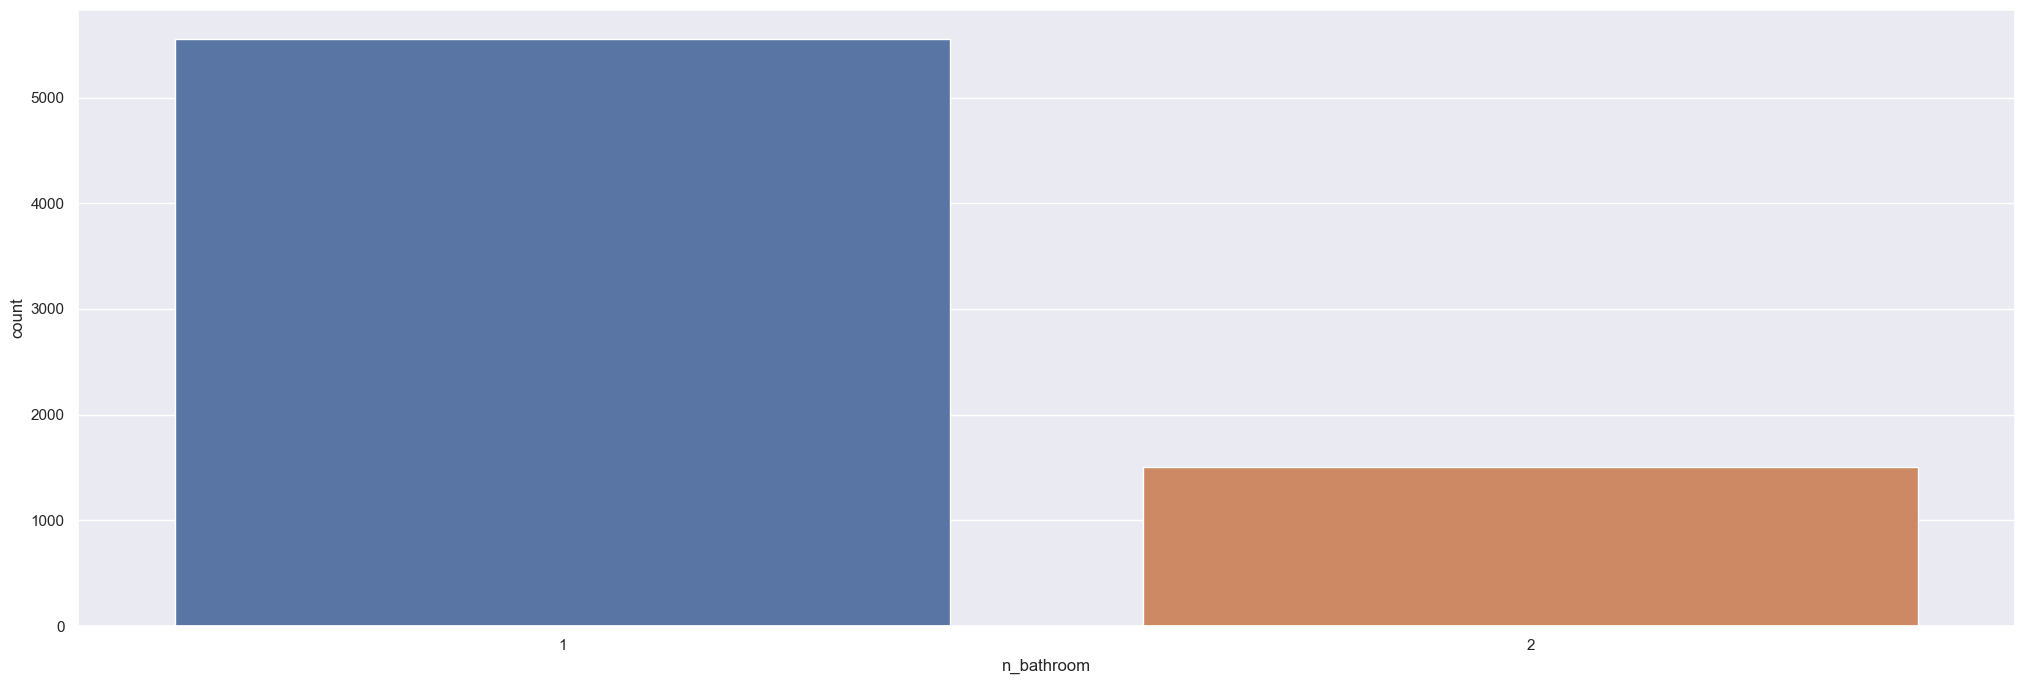

In [55]:
sns.set(rc={"figure.figsize":(25,8)})
sns.countplot(data["n_bathroom"], data=data)

[Text(0, 0, '9.97627e+06'), Text(0, 0, '1.13296e+07')]

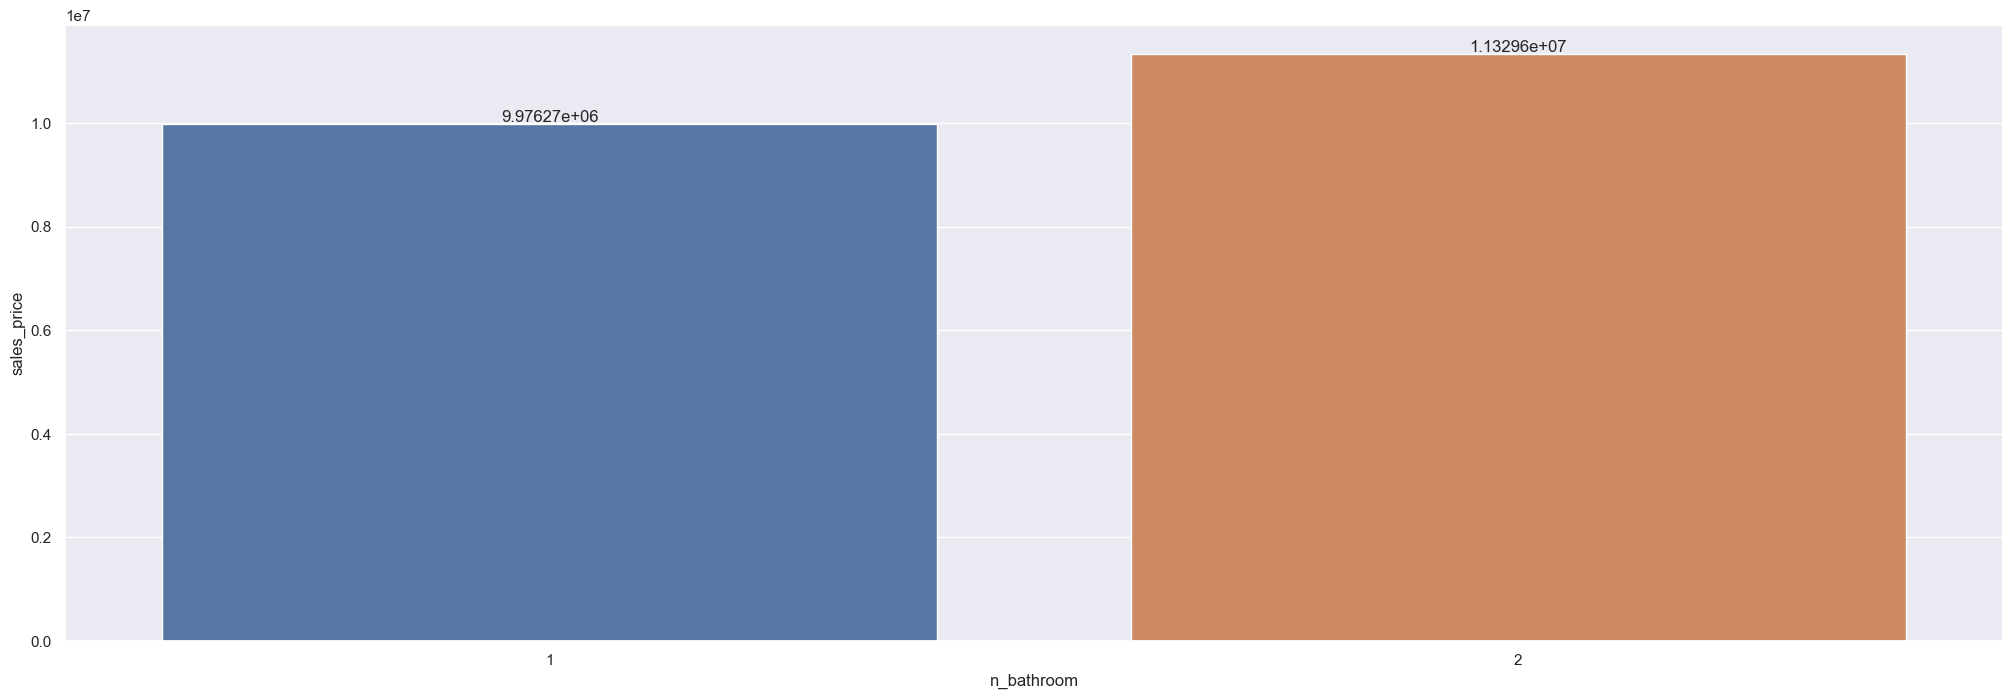

In [56]:
groupedvalues = data.groupby('n_bathroom').median().reset_index()
 
n_bathroom = sns.barplot(x='n_bathroom', y='sales_price', data=groupedvalues, errwidth=0)
 
n_bathroom.bar_label(n_bathroom.containers[0])

#### Observation:
    * The average cost increase when comparing double bathroom house prices to single bathroom house prices is 13%.

[Text(0, 0, '3'), Text(0, 0, '5')]

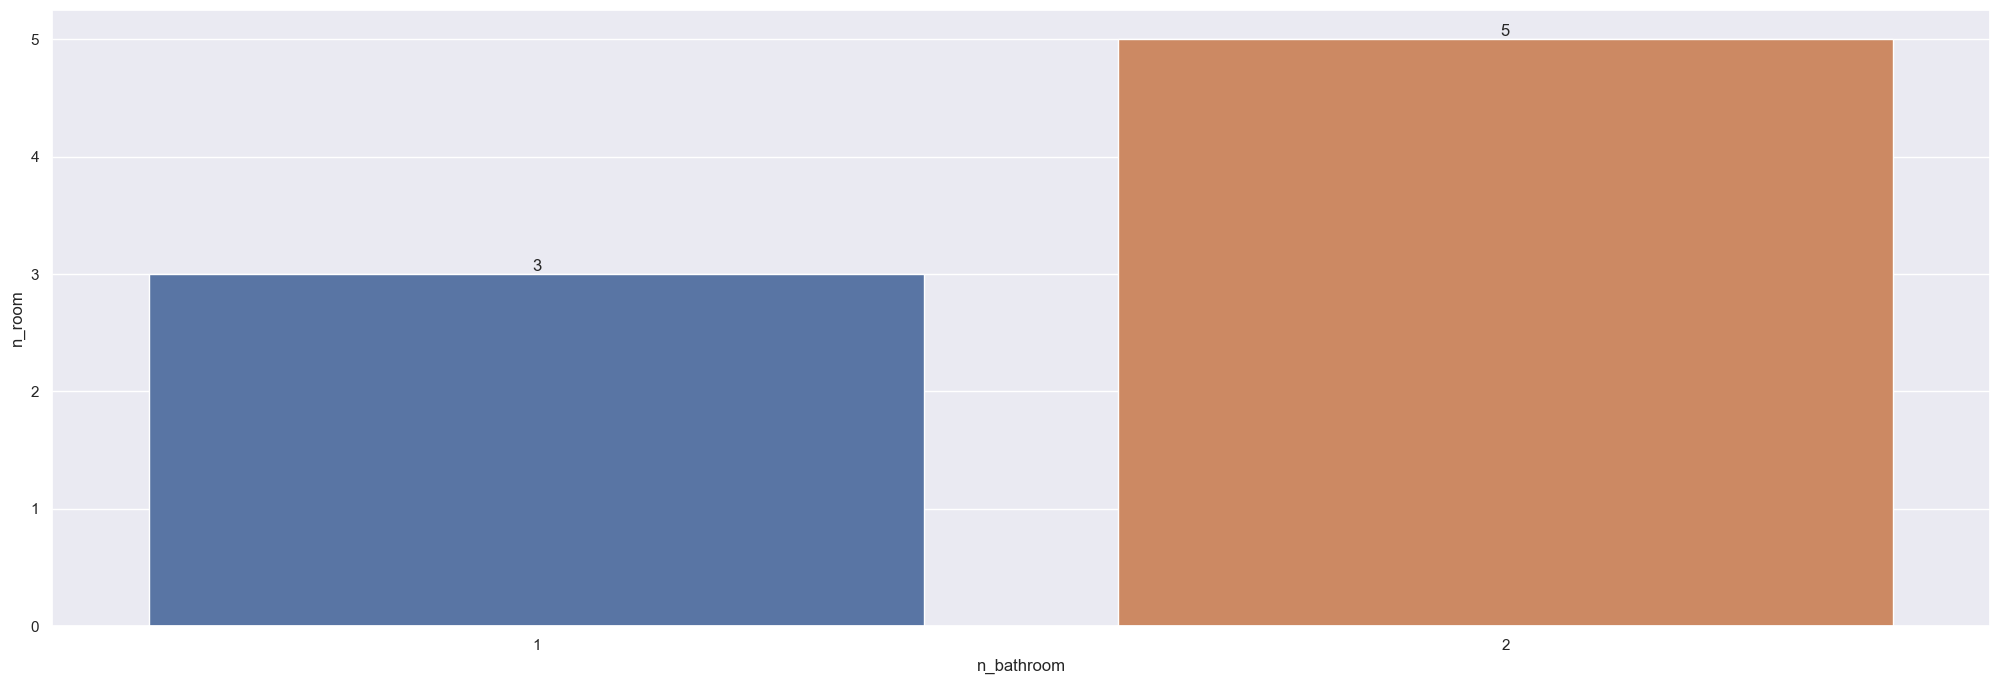

In [57]:
groupedvalues = data.groupby('n_bathroom').median().reset_index()
 
n_bathroom = sns.barplot(x='n_bathroom', y='n_room', data=groupedvalues, errwidth=0)
 
n_bathroom.bar_label(n_bathroom.containers[0])

#### observation:

* When comparing 3 rooms in a house, at least 1 bathroom must be present.
* When comparing 5 rooms in a house, at least 2 bathroom is the most present.

In [58]:
data["qs_overall"].describe()

count    7056.000000
mean        3.503845
std         0.527308
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: qs_overall, dtype: float64

<AxesSubplot:xlabel='qs_overall'>

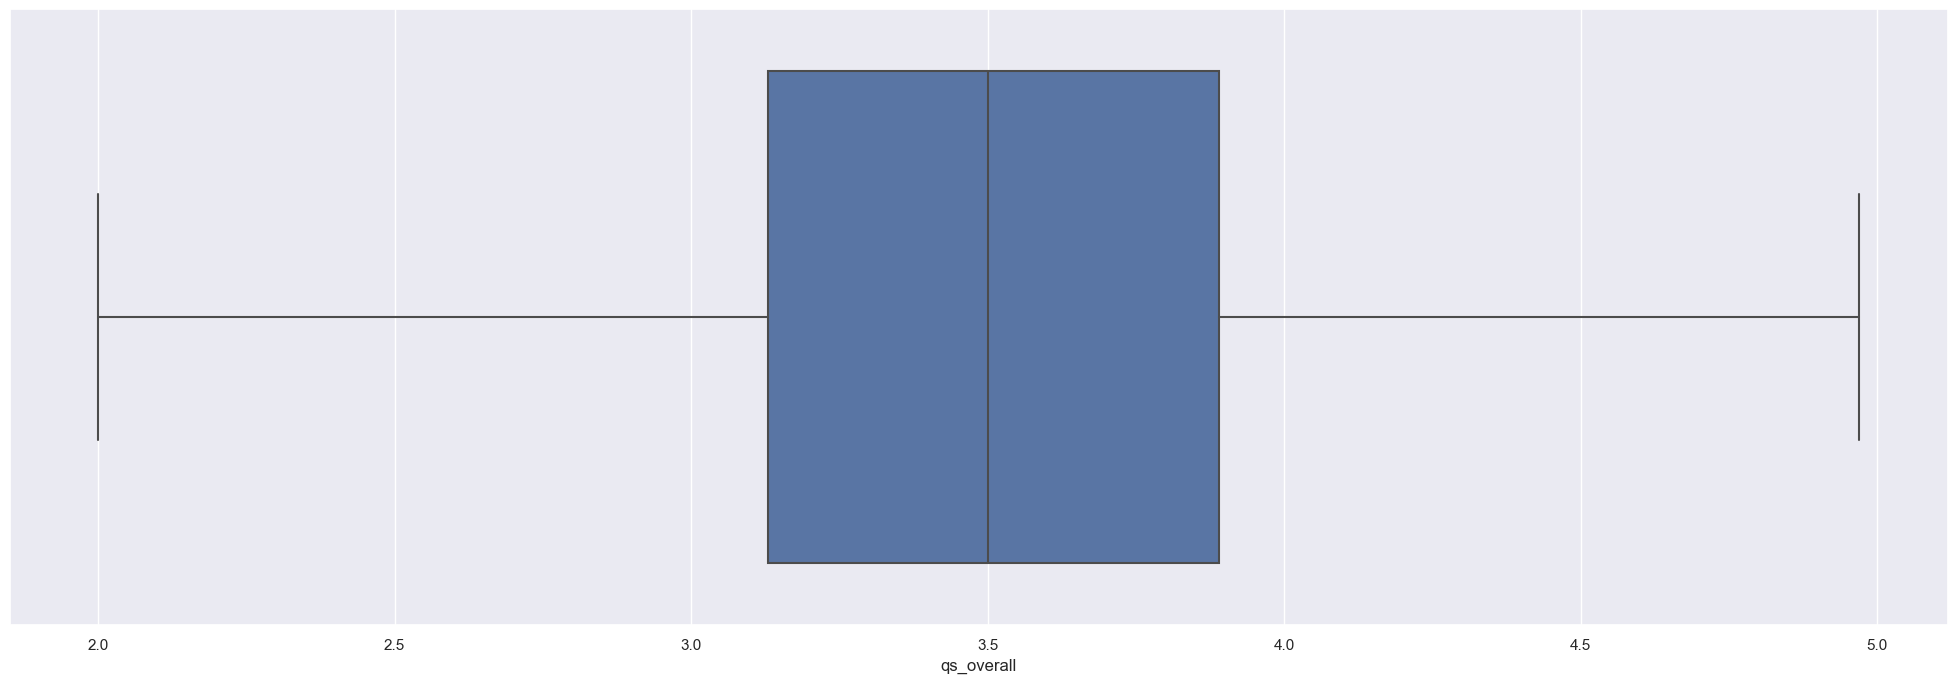

In [59]:
sns.boxplot(x=data["qs_overall"])

## Heatmaps

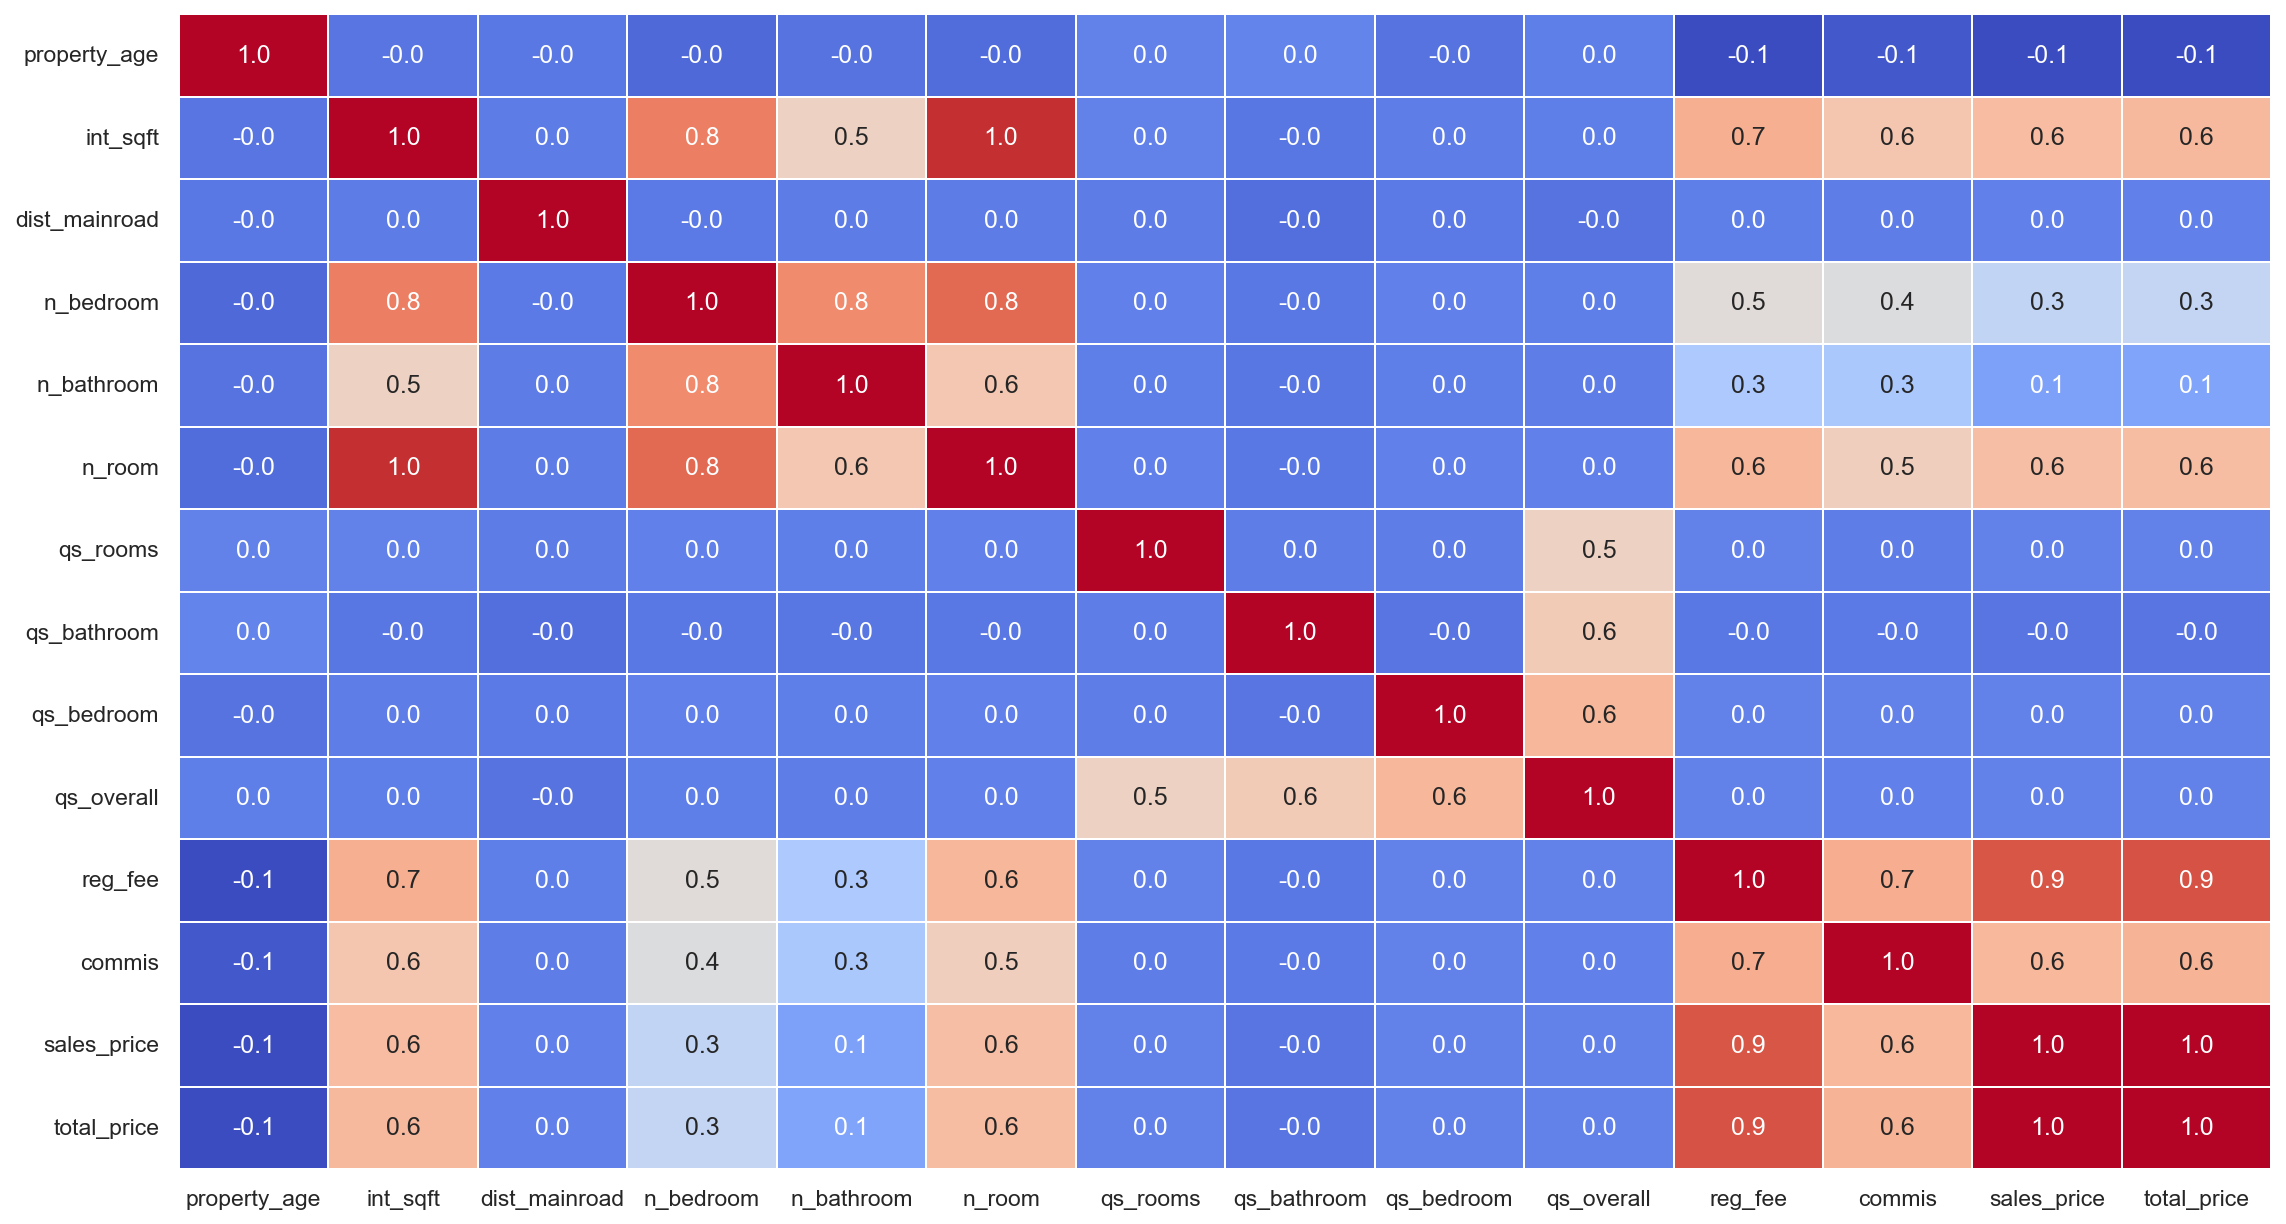

In [60]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');


* Heatmaps are very useful to find relations between two variables in a dataset.
* numerical columns there are some correlation between target and features which are shown in reddish colour.

# Distribution of Features in Data Columns

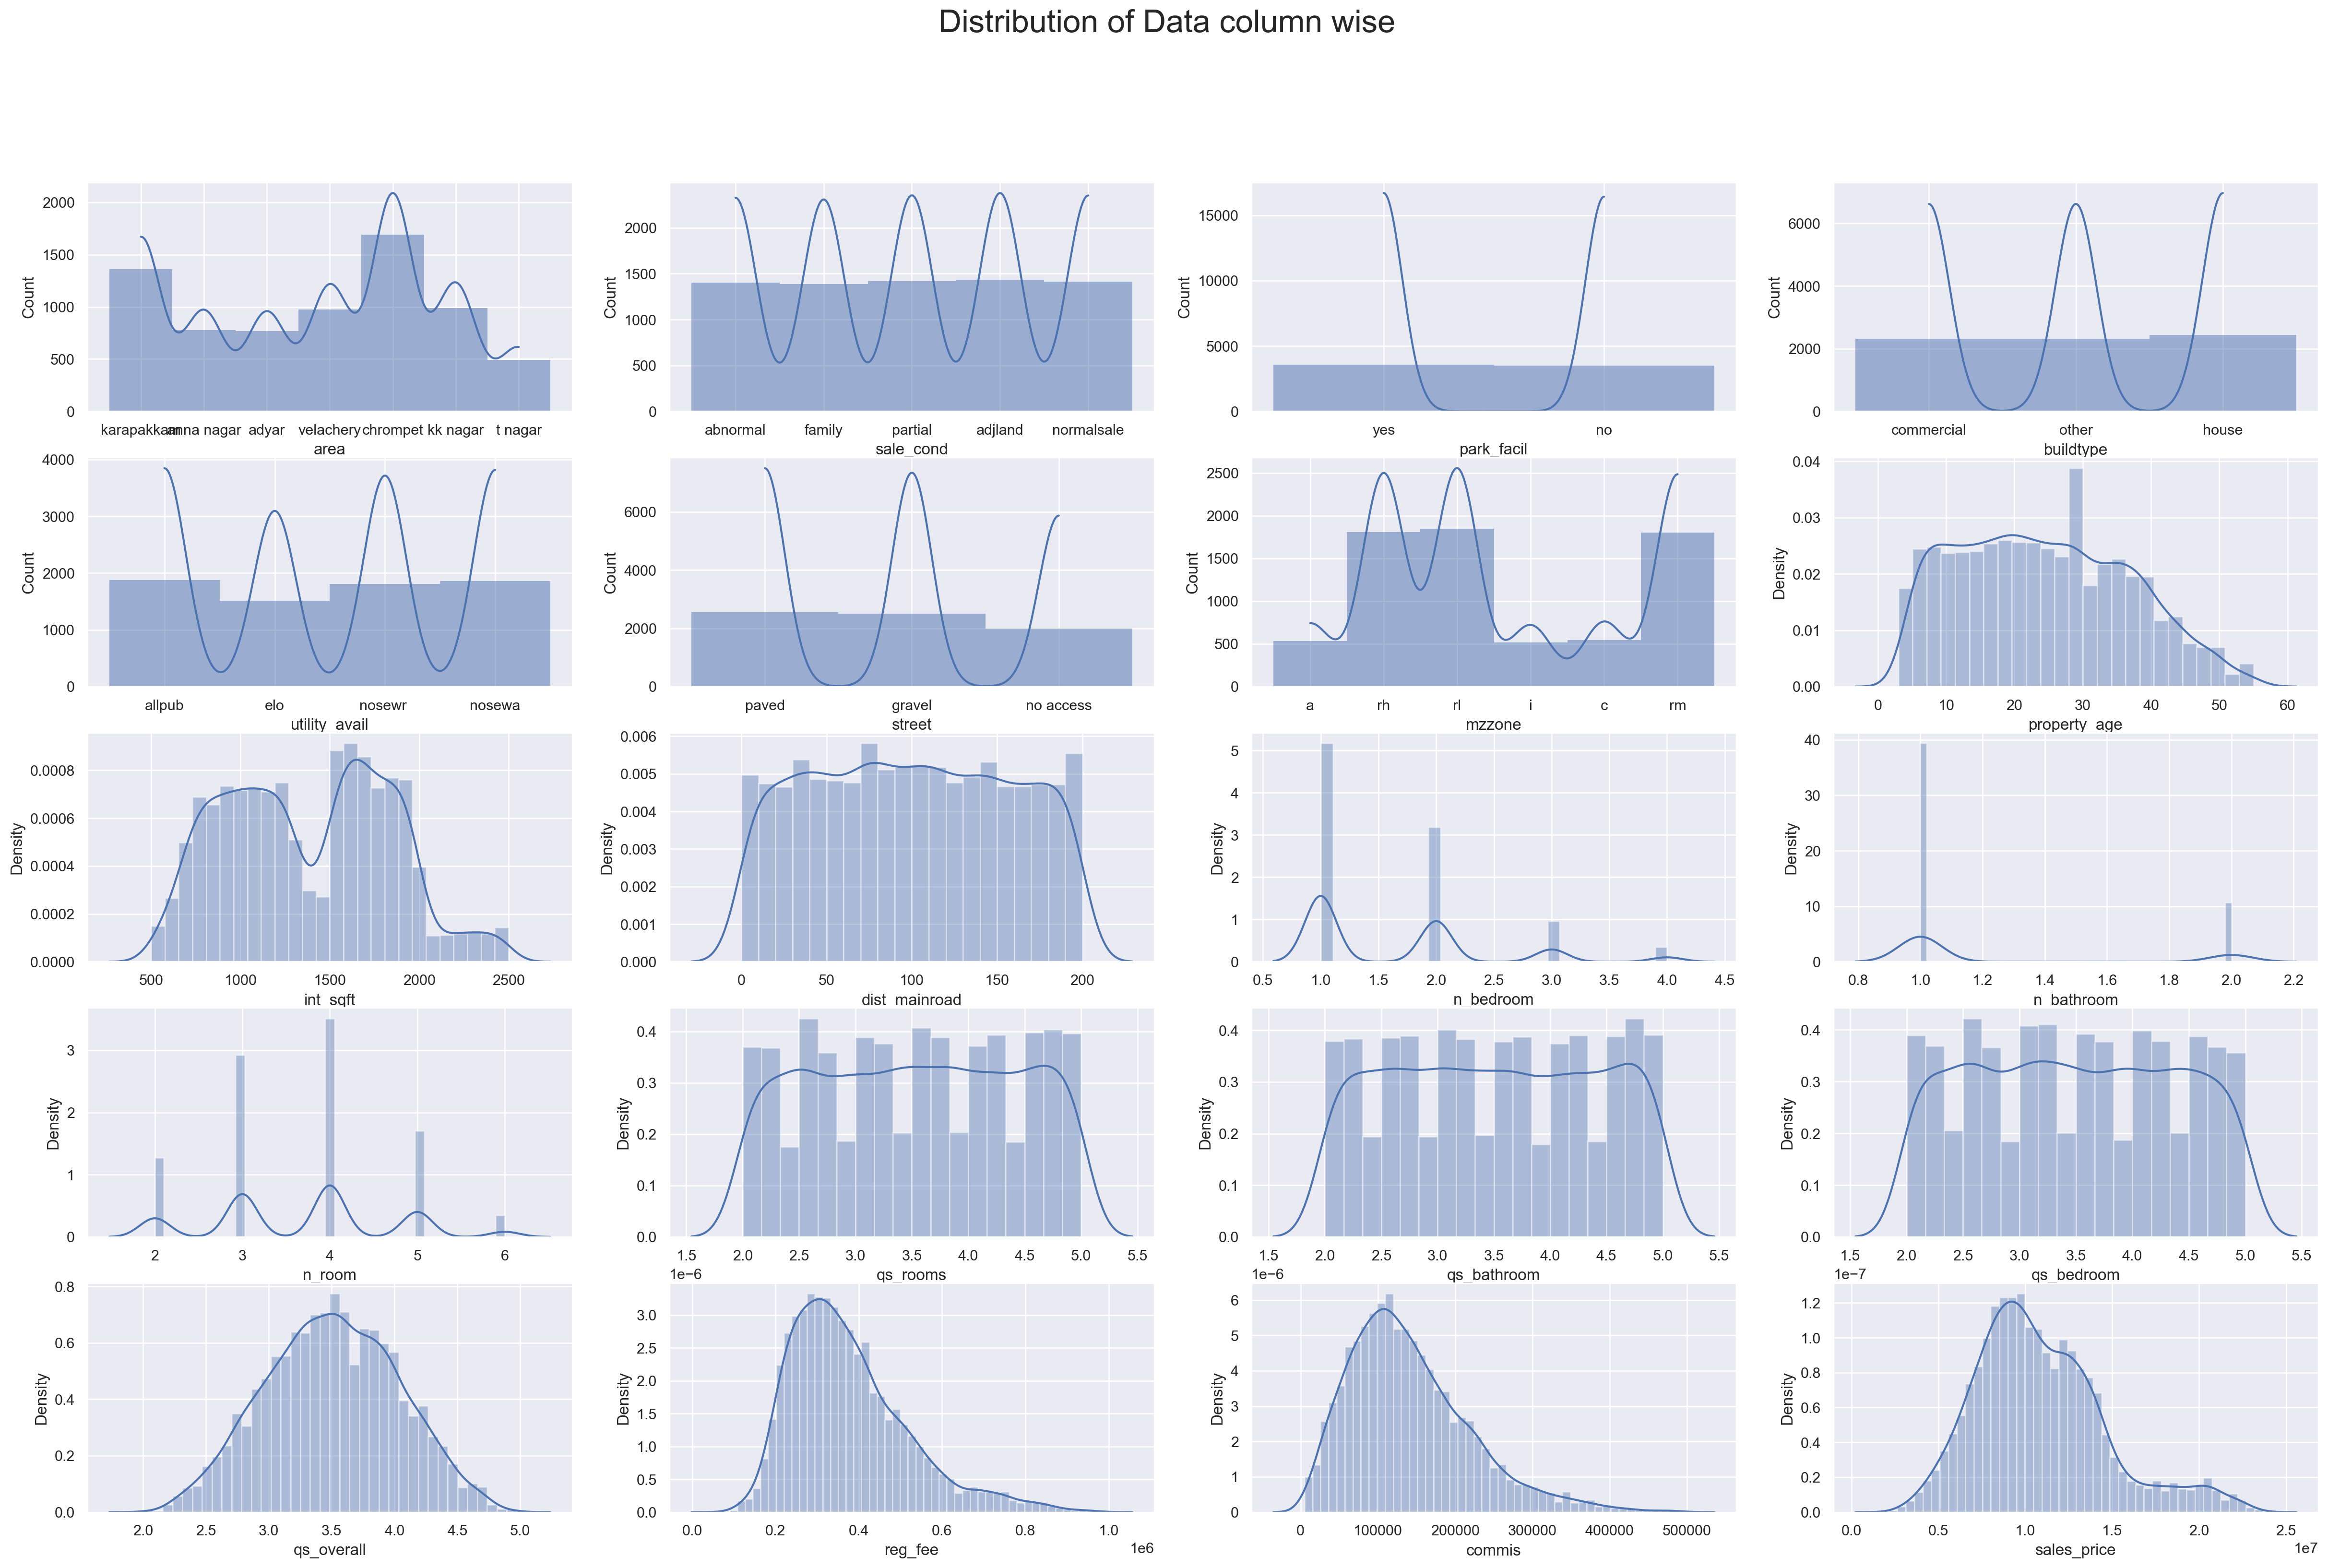

In [61]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(data.property_age)

plt.subplot(5,4,9)
sns.distplot(data.int_sqft)

plt.subplot(5,4,10)
sns.distplot(data.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(data.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(data.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(data.n_room)

plt.subplot(5,4,14)
sns.distplot(data.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(data.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(data.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(data.qs_overall)

plt.subplot(5,4,18)
sns.distplot(data.reg_fee)

plt.subplot(5,4,19)
sns.distplot(data.commis)

plt.subplot(5,4,20)
sns.distplot(data.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=24)
plt.show()

distribution of data in all the columns are normally distributed in most of the cases and in very few column thd data is very slightly skewed.

# Plotting Features column vs Target column

Here we plot two type of data:
*   Numerical Columns
*   Categorical Columns

## Plotting of Numerical data vs Target
Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales.

#### Here we plot 2 type of numerical data:
1.   Continues numerical variable
2.   Decsrete numerical variable

# Numerical Columns
1) Continues numerical variable
Here we are plotting all our Continues numerical variable columns with total price of the house to figure out, is there any relation between Continues numerical variable features column and total sales.

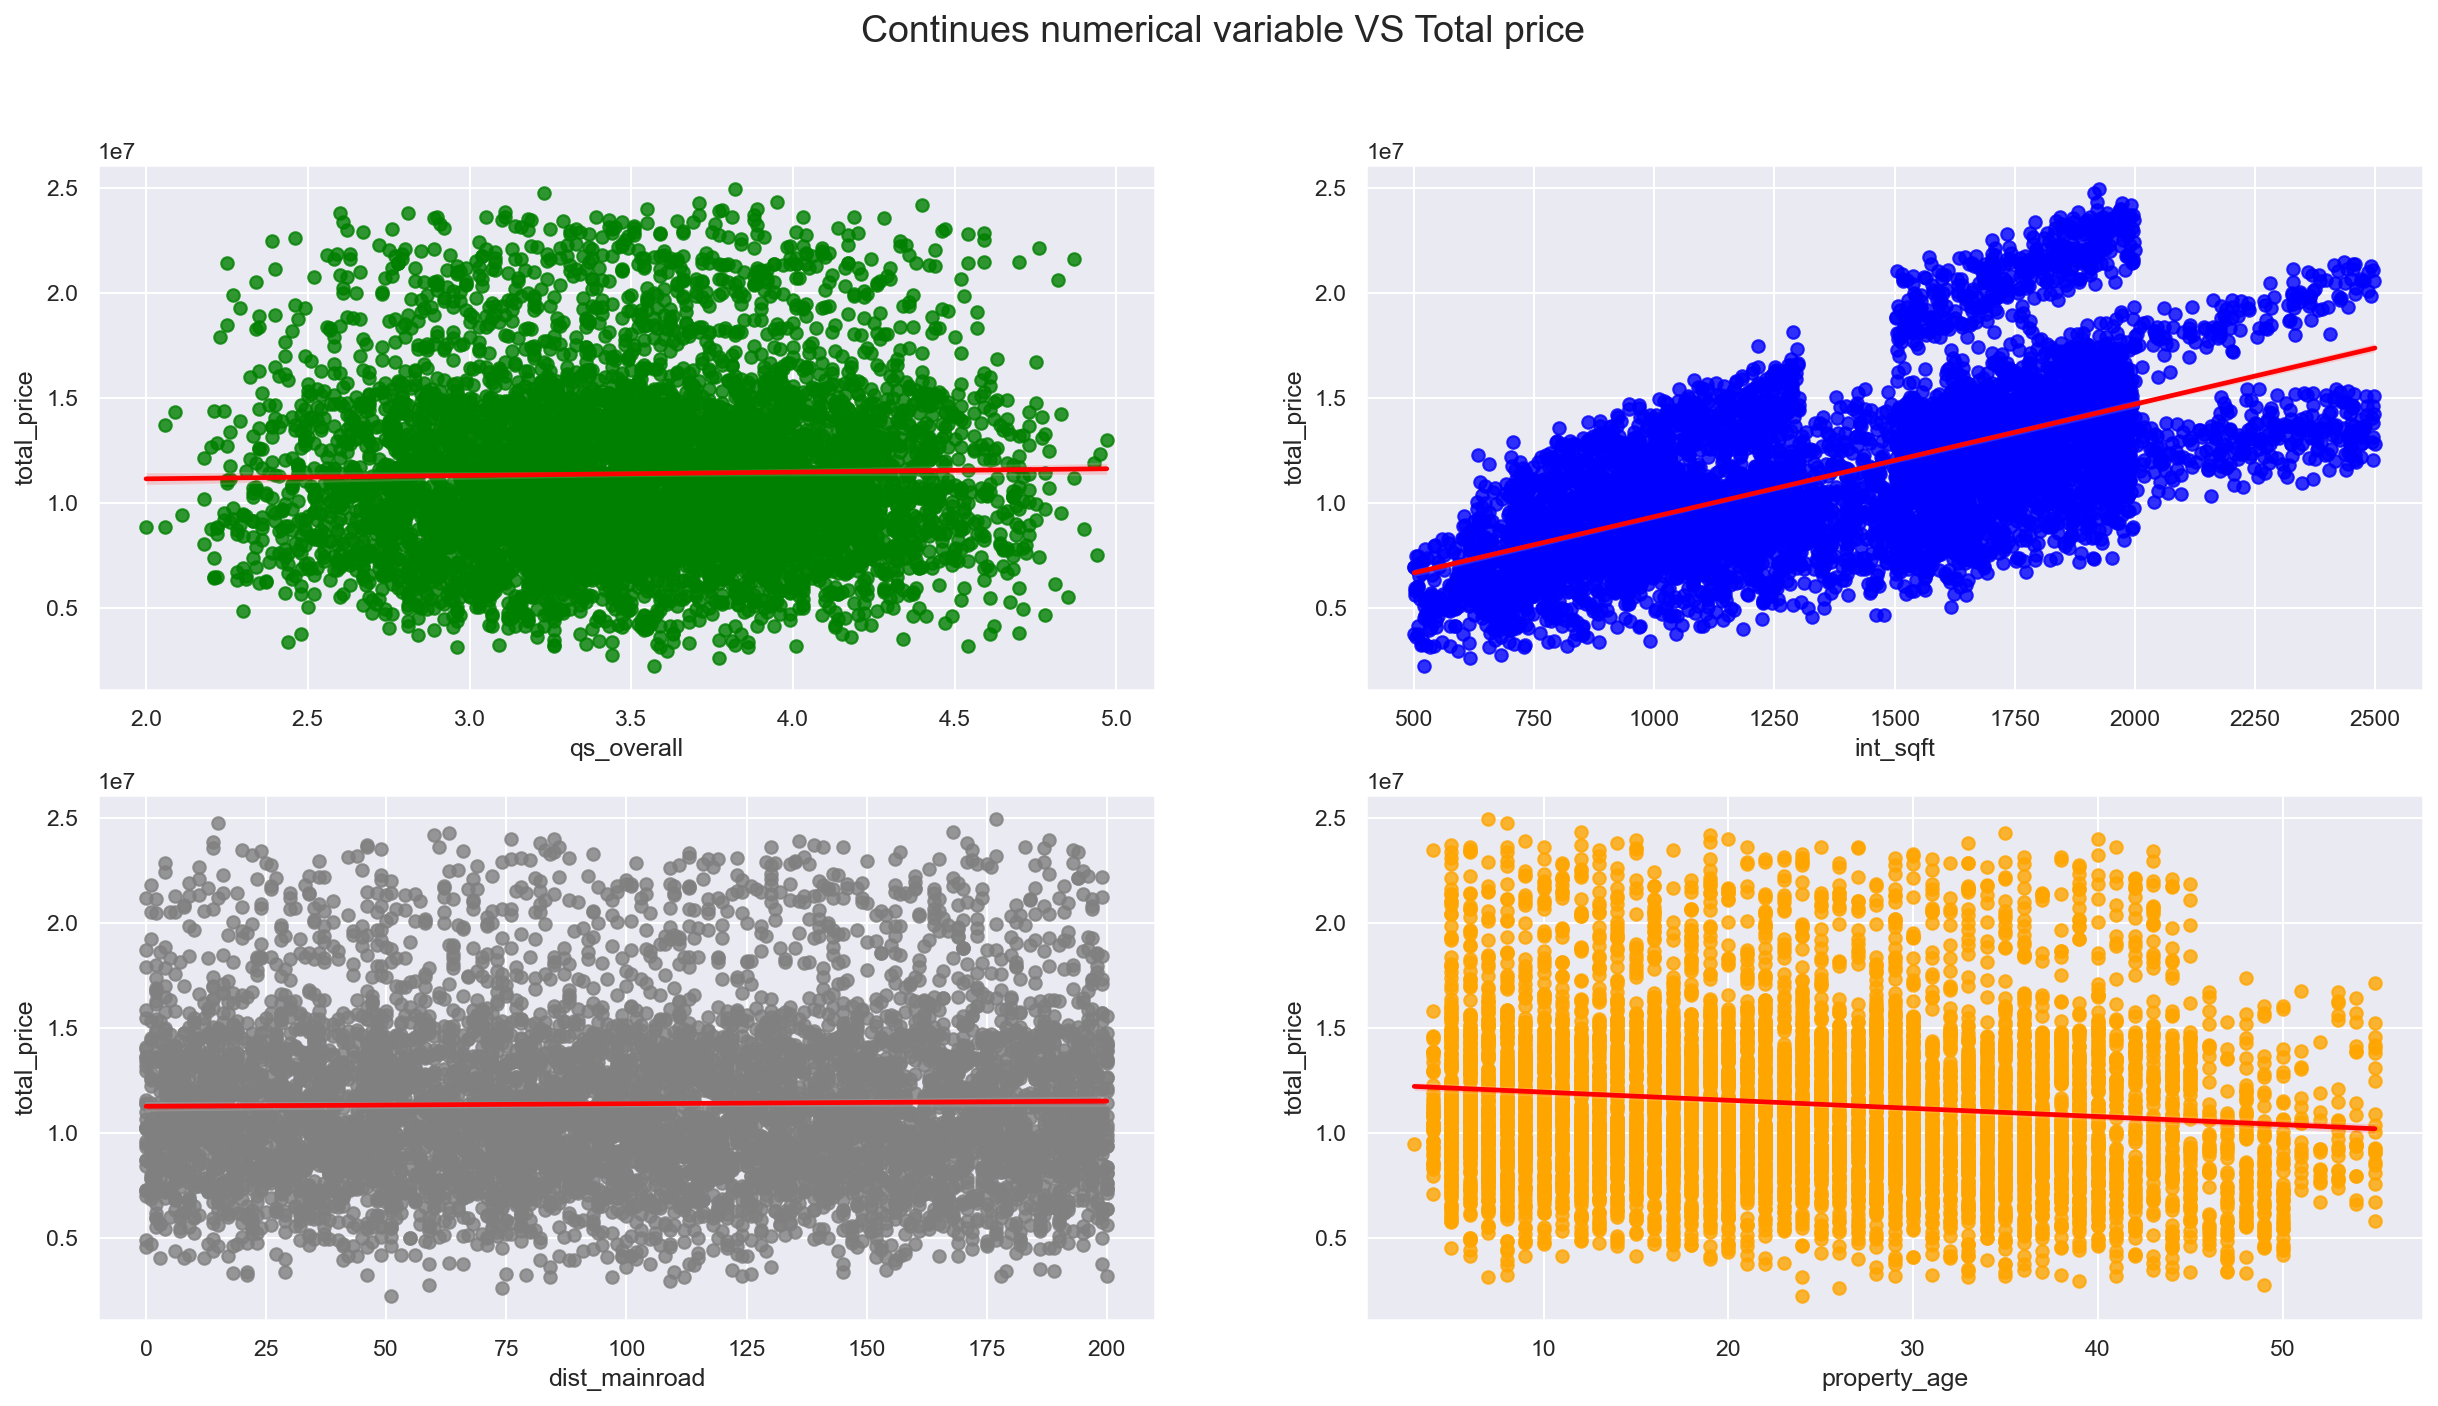

In [62]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(data.qs_overall, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(data.int_sqft, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(data.dist_mainroad, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(data.property_age, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continues numerical variable VS Total price", fontsize=18)
plt.show()

Here we can come to conclusion that:

*   In qs_overall we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In int_sqft we find good relation so this feature will be very important for us so we will keep it.
*   In dist_mainroad we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In property_age we find small relation so this feature will be useful for us so we will keep it.

## 2) Discrete numerical variable

Here we are plotting all our discrete numerical variable columns with total price of the house to figure out, is there any relation between discrete numerical variable features column and total sales.

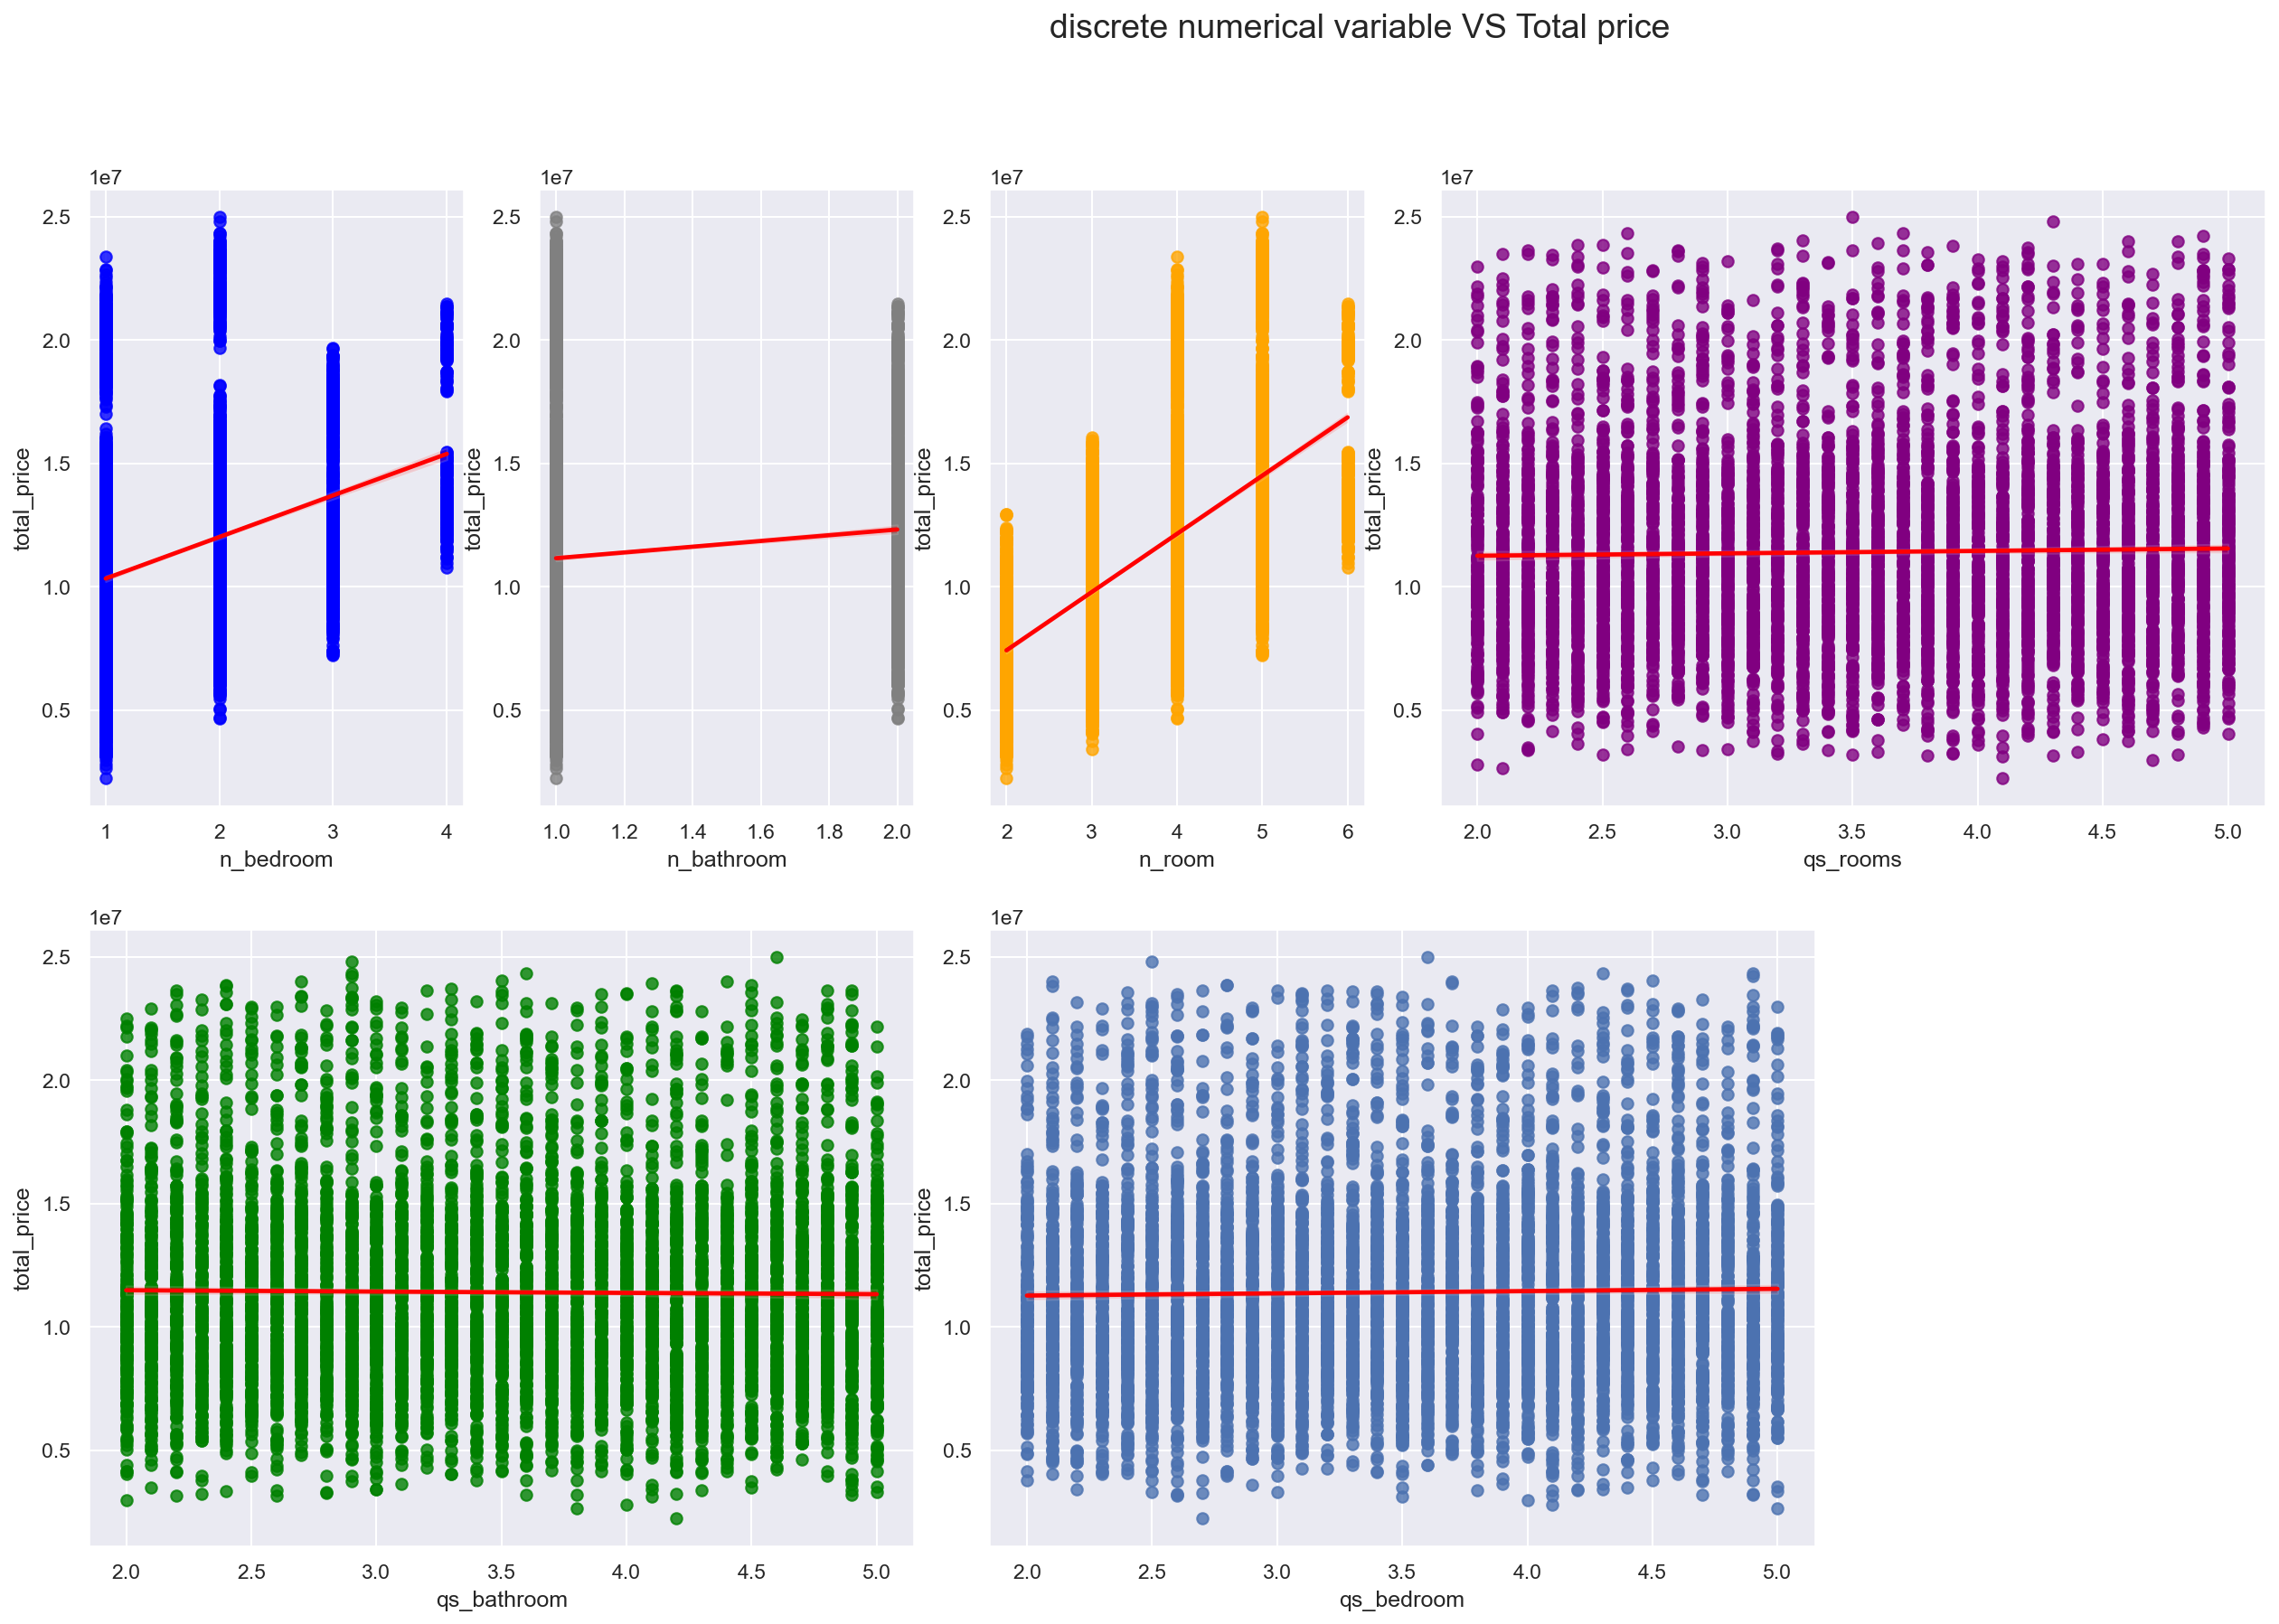

In [63]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(data.n_bedroom, data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(data.n_bathroom, data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(data.n_room, data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(data.qs_rooms, data.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(data.qs_bathroom, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(data.qs_bedroom, data.total_price, line_kws={"color": "red"})

plt.suptitle("discrete numerical variable VS Total price", fontsize=18)
plt.show()

Here we can come to conclusion that:

*   In n_bedroom we find good relation so this feature will be very important for us so we will keep it.
*   In n_bathroom we find small relation so this feature will be useful for us so we will keep it.
*   In n_room we find good relation so this feature will be very important for us so we will keep it.
*   In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

# Commision and Registration fee columns:
* On top of all numerical columns we are given registration fee and commission columns on which sales price don't depends on but these two columns are completly depended on sales column value. That means after determining the sales price the commission and registration fee are paid.
* Hence, these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price. And at the end compare this result with only predicted sales price.

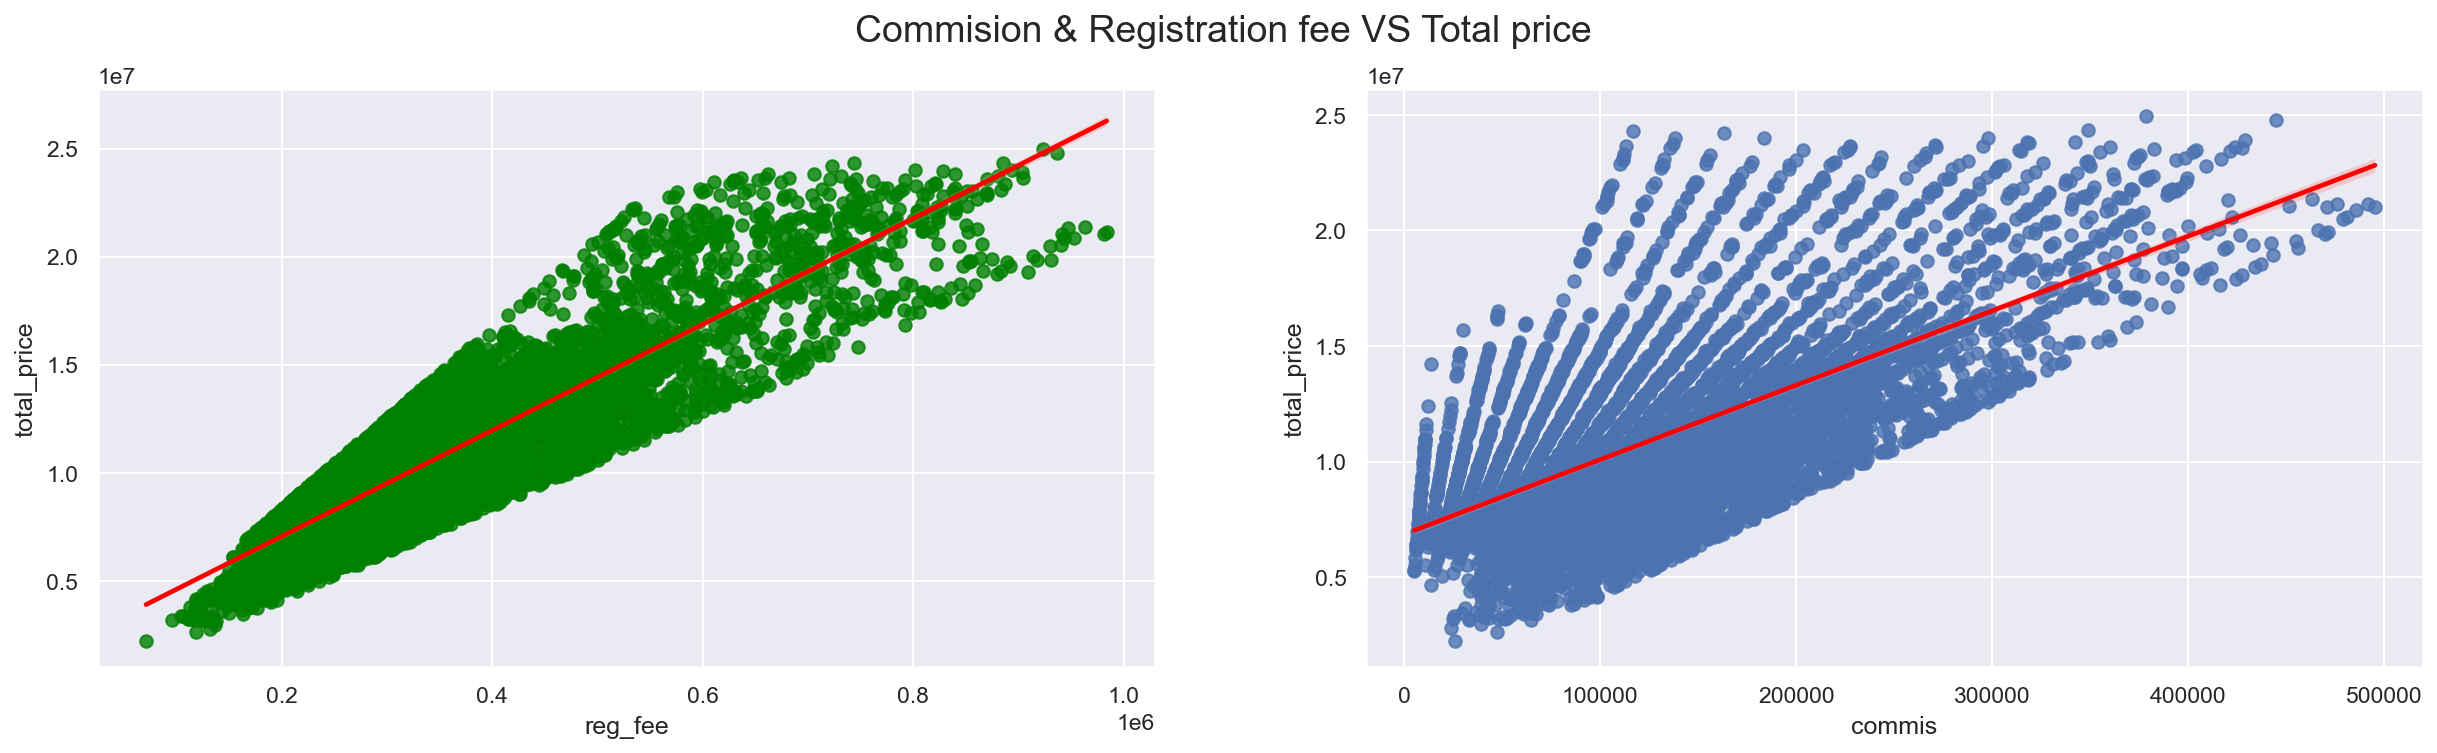

In [64]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(data.reg_fee, data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(data.commis, data.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

# Categorical Columns
### Plotting of Categorical data vs Target
Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total sales.

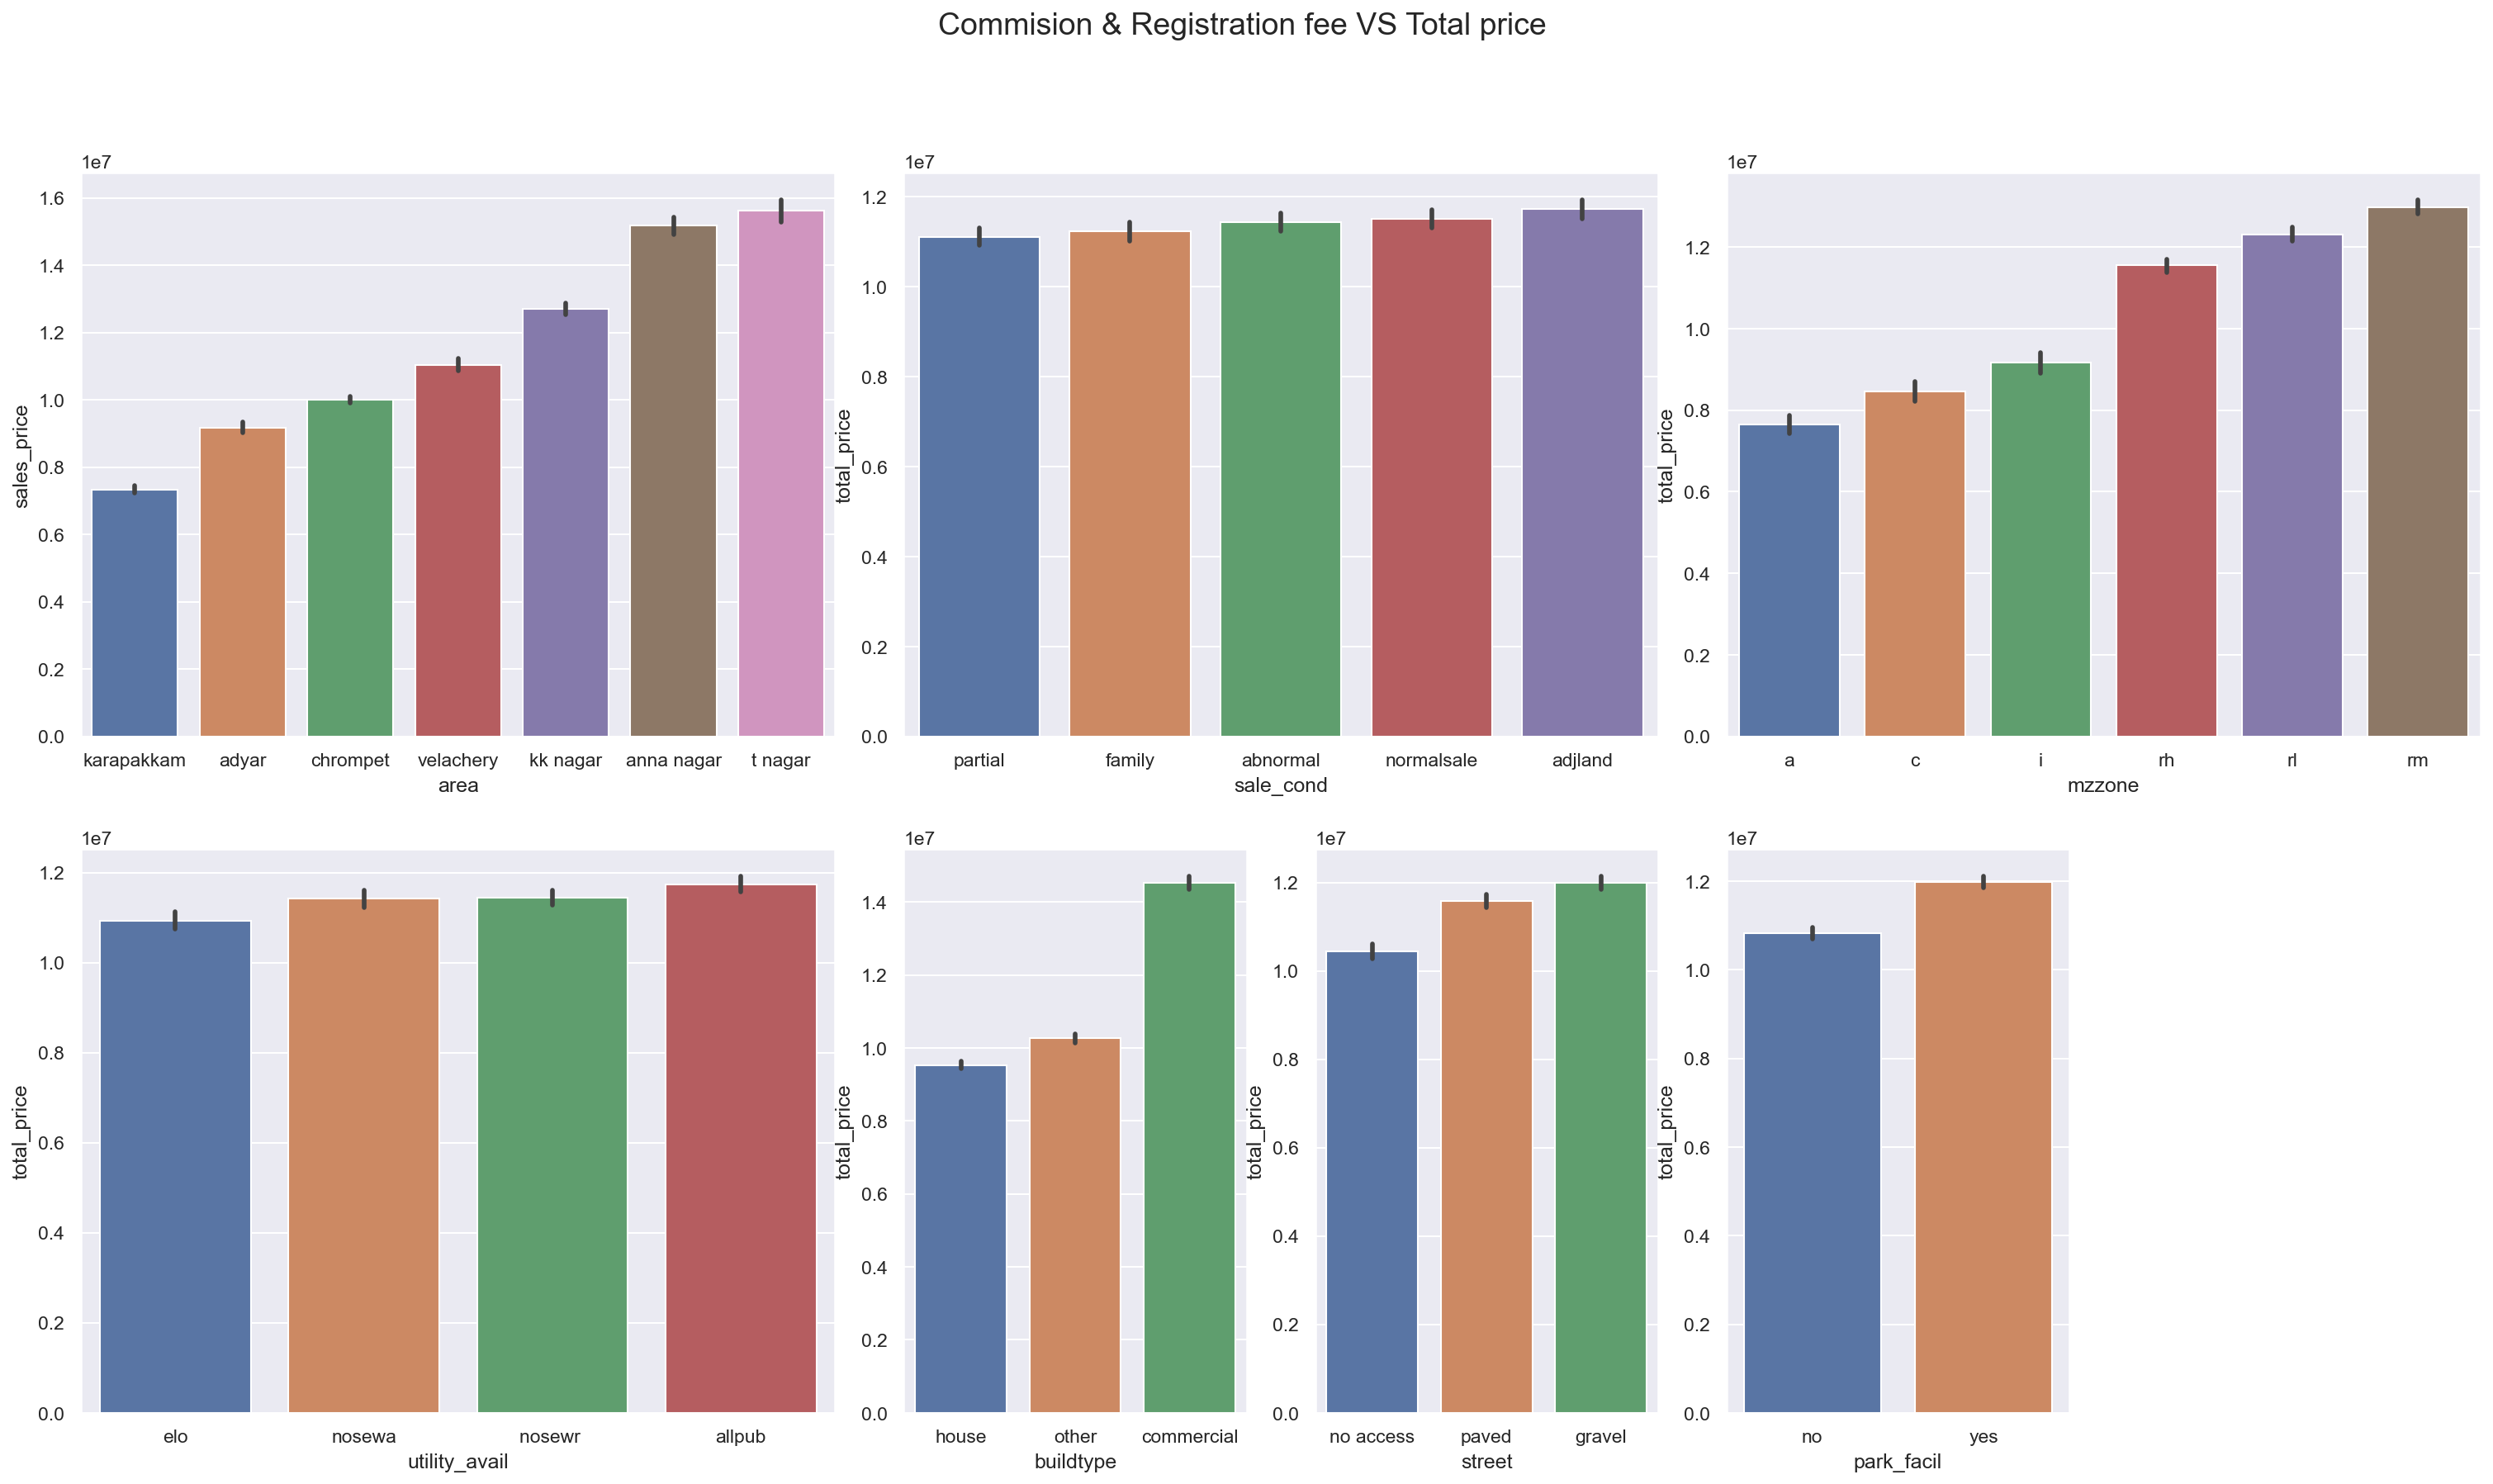

In [65]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.area,y=data.sales_price,order=data.groupby('area')['total_price'].mean().reset_index().sort_values('total_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.sale_cond,y=data.total_price,order=data.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.mzzone,y=data.total_price,order=data.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.utility_avail,y=data.total_price,order=data.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.buildtype, y=data.total_price,order=data.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.street,y=data.total_price,order=data.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.park_facil,y=data.total_price,order=data.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Here we can come to conclusion that:

*   In area when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In sale_cond when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In mzzone when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In utility_avain when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In buildtype when we sort column in respect of total_price we didn't find linear relation in this categorical feature but it may beimportant for us so we will keep it and do OneHotEncoding on this column data.
*   In street when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*   In park_facil when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

# Encoding

From here onwards encoding of data will start in for categorical data in sequential manner in numerical so that computer can understand those data columns.

## OneHotEncoder
Here we are encoding nominal categorical columns which don't have any order present in them with OneHotEncoder. But to be simple we have just used get_dummies feature from pandas.

In [66]:
data = pd.get_dummies(data,columns=['buildtype'])

## Label Encoder (Mapping)
Here we are encoding ordinal categorical columns which have some order present in them and we havr to preserve the order so here we use Lebel/Ordinal encoder. So, for simplicity i have just simply mappes the values in order of the data.

# Encoding the area column order-wise 

In [67]:
data.area = data.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

In [68]:
# Encoding the sale_cond column order-wise 

In [69]:
data.sale_cond = data.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

In [70]:
# Encoding the park_facil column order-wise 

In [71]:
data.park_facil = data.park_facil.map({'yes':1,
                                       'no':0})

In [72]:
# Encoding the utility_avail column order-wise 

In [73]:
data.utility_avail = data.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})

In [74]:
# Encoding the street column order-wise

In [75]:
data.street = data.street.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})

In [76]:
# Encoding the mzzone column order-wise 

In [77]:
data.mzzone = data.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})

In [78]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
data = data.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

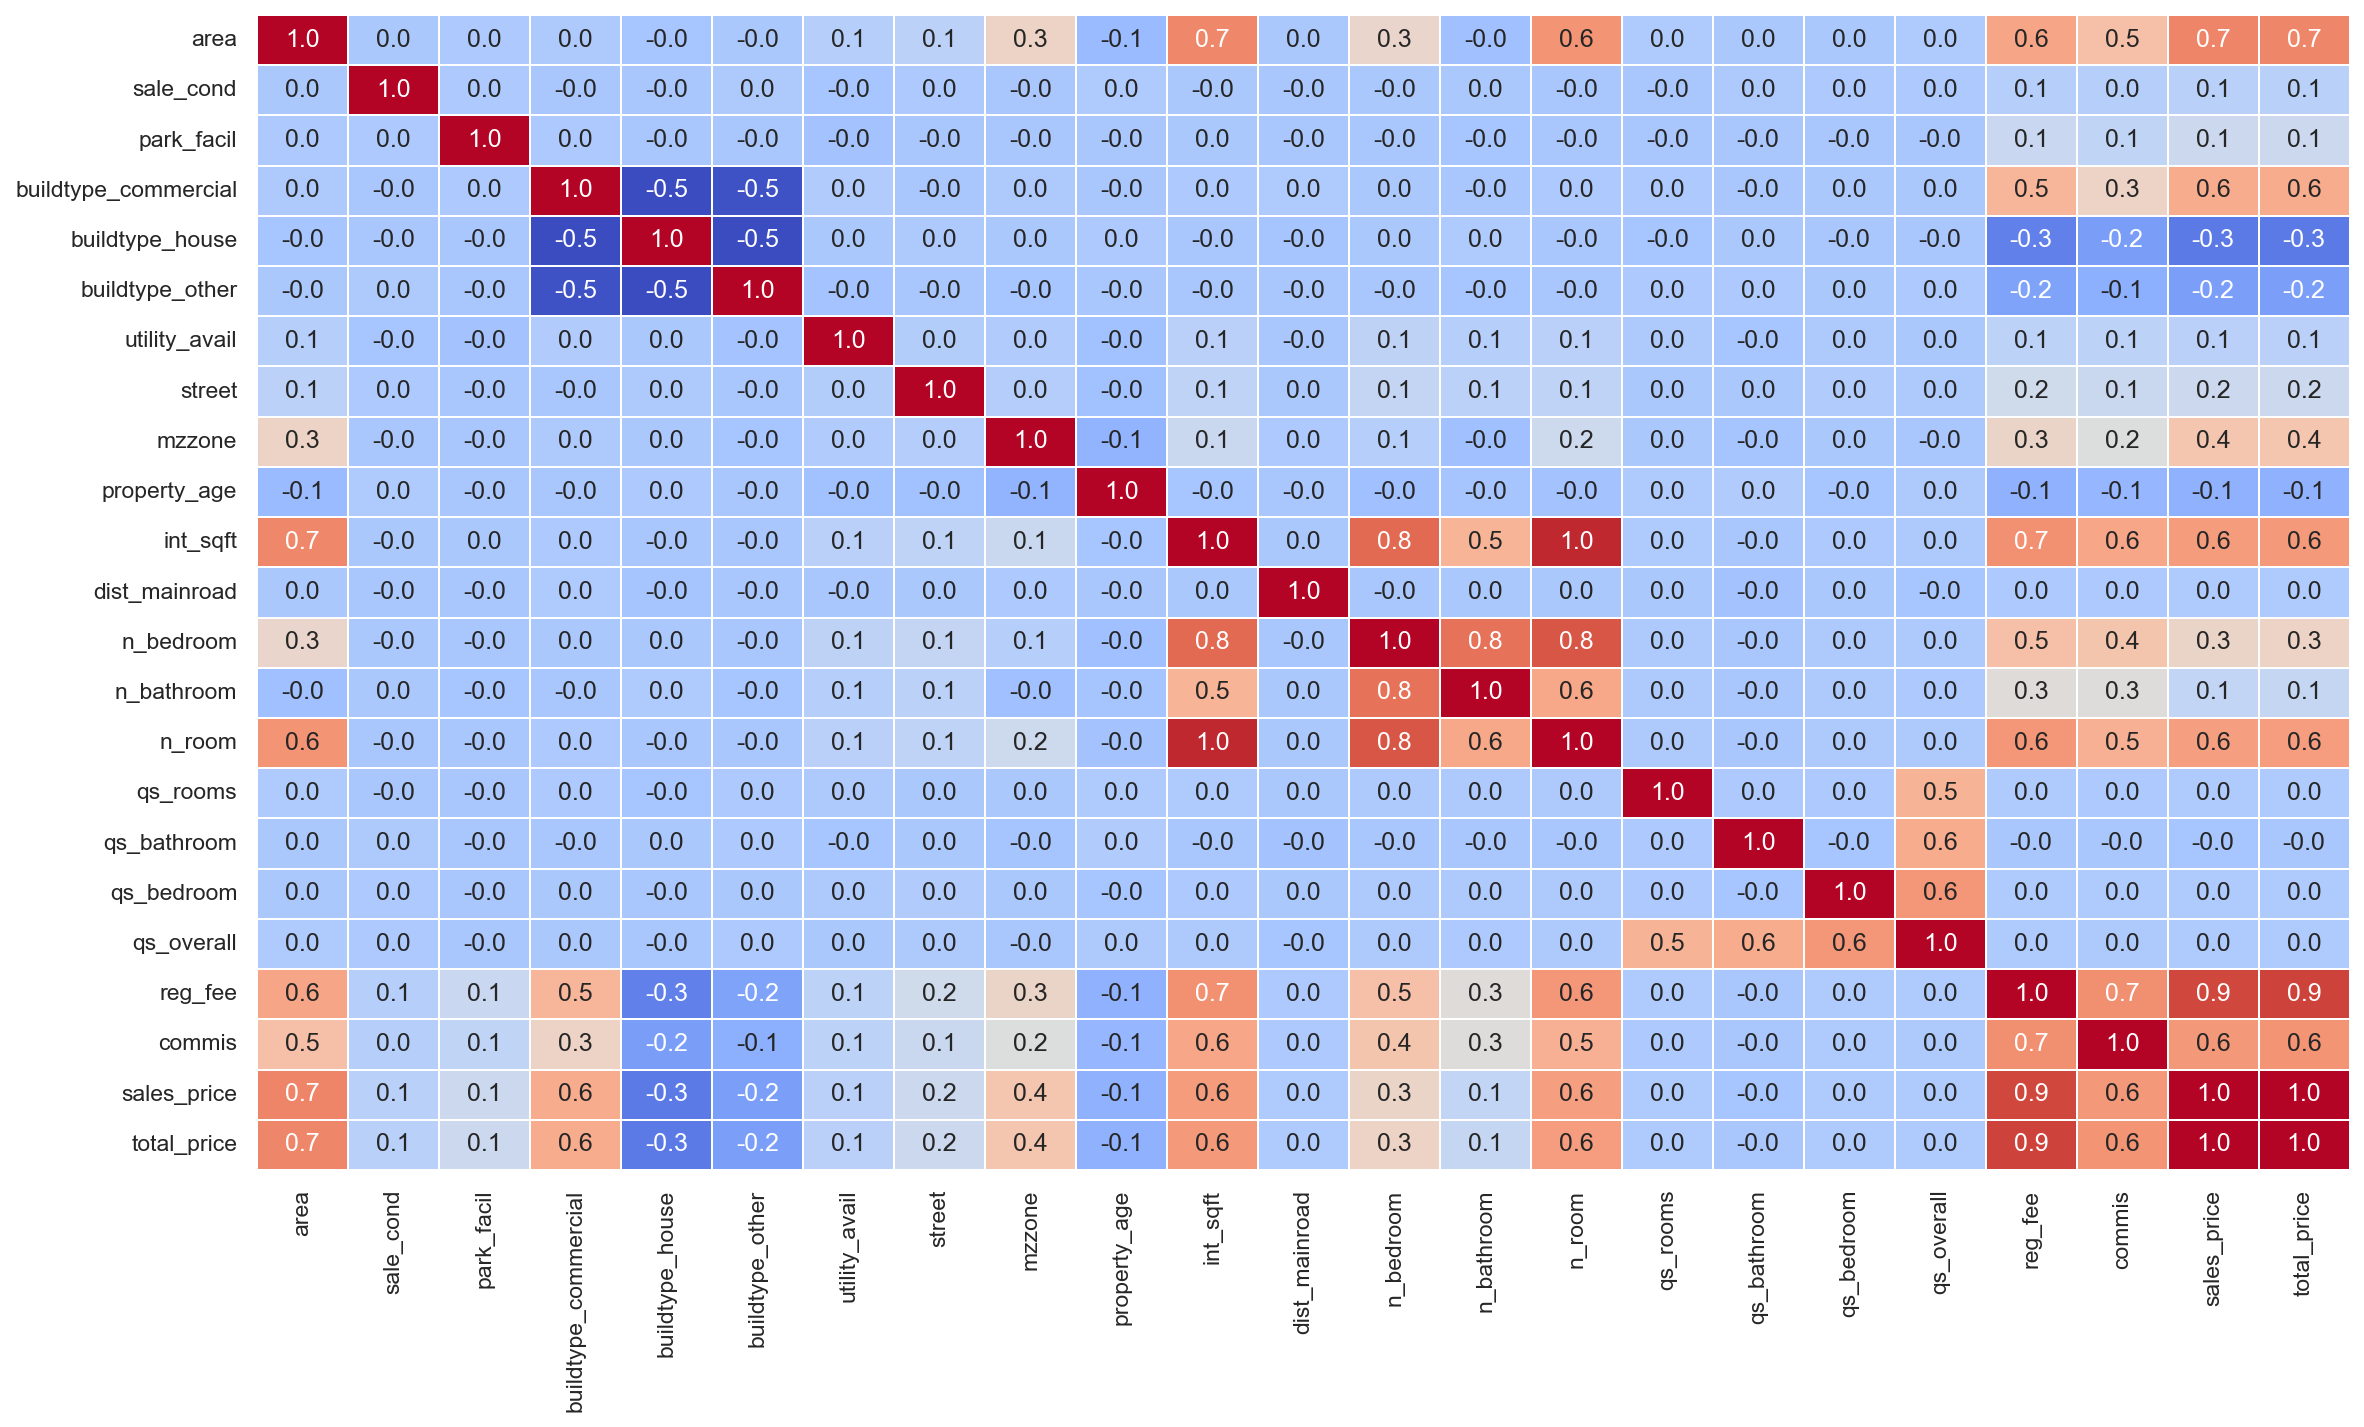

In [79]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

Here after encoding all columns we can see that in categorical columns also there are some correlation between target and features as we can there is a very good correlation between some columns of our data which are soon in reddish colour.

In [80]:
data.head(3)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1        3.0           1                     1                0   
1     6        3.0           0                     1                0   
2     2        3.0           1                     1                0   

   buildtype_other  utility_avail  street  mzzone  property_age  int_sqft  \
0                0              4       2       1            44      1004   
1                0              4       3       4            11      1986   
2                0              1       3       5            20       909   

   dist_mainroad  n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  \
0            131          1           1       3       4.0          3.9   
1             26          2           1       5       4.9          4.2   
2             70          1           1       3       4.1          3.8   

   qs_bedroom  qs_overall  reg_fee  commis  sales_price  total_price  
0         4.9        4.33   380000  144400      7600000      8124400  
1         2.5        3.77   760122  304049     21717770     22781941  
2         2.2        3.09   421094   92114     13159200     13672408

In [81]:
# Removing unnecessary features thich has negligible relation with total_price
df = data.copy()
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee', 'commis'], axis=1, inplace=True)

In [82]:
input_cols = ['area', 'park_facil', 'buildtype_commercial', 'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'

X = df[input_cols].copy()
Y = df[target_cols].copy()

# Splitting the data for training and testing

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

In [84]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((5644, 13), (5644,), (1412, 13), (1412,))

### Model Treaning
From here on we will start building model on top of data which we have prepared till now and we will try all different kind of machine learning models and try to get best r-square score for all 3 type of data that are normaldata, MinMaxScaled data and StandardScaler data.

# LinearRegression

In [85]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
linearr2 = metrics.r2_score(y_test,y_pred)
linearmse = metrics.mean_squared_error(y_test,y_pred)

n = len(y_test)
k = 13
linear_ajr2 = 1-((1-linearr2)*(1-n))/(n-k-1)

In [86]:
data=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
#data

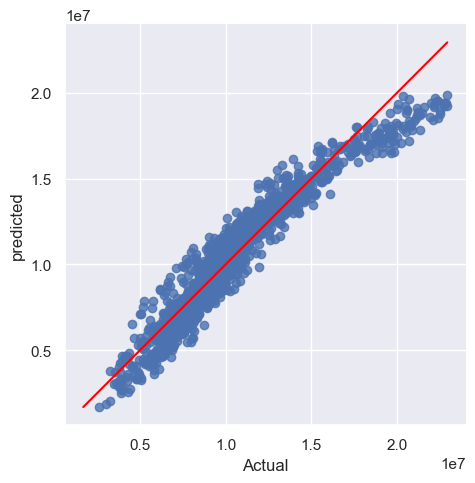

In [87]:
sns.lmplot(x="Actual",y="predicted", data=data, fit_reg=False)
d_line=np.arange(data.min().min(),data.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")
plt.show()

# Ridge Regression

In [88]:
rr = Ridge(alpha = 0.5)
rr_model = rr.fit(X_train, y_train)
y_predrr = rr_model.predict(X_test)

ridger2 = metrics.r2_score(y_test,y_predrr)

ridgemse = metrics.mean_squared_error(y_test,y_predrr)

ridge_ajr2 = 1-((1-ridger2)*(1-n))/(n-k-1)

# Lasso Regression

In [89]:
lasso = Lasso(alpha = 0.08)
lasso_model = lasso.fit(X_train, y_train)
y_predla = lasso_model.predict(X_test)
lassor2 = metrics.r2_score(y_test,y_predla)

lassomse = metrics.mean_squared_error(y_test,y_predla)

lasso_ajr2 = 1-((1-lassor2)*(1-n))/(n-k-1)

# KNearestNeighbors

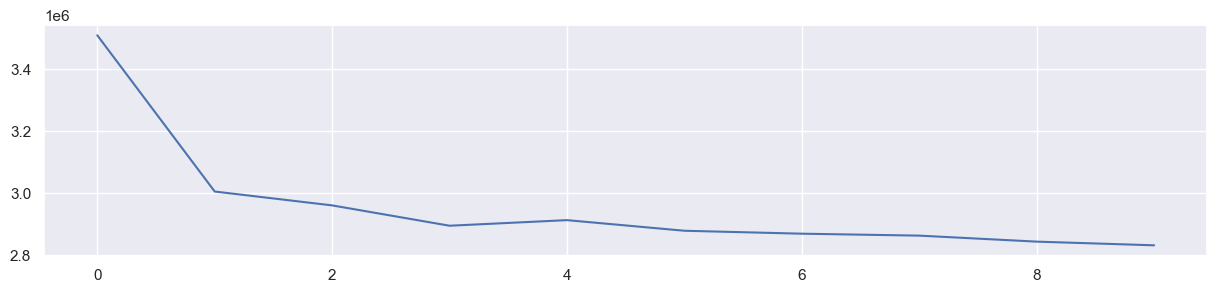

In [90]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

plt.figure(figsize=(15,3))
plt.plot(curve)
plt.show()

In [91]:
knn = KNeighborsRegressor(n_neighbors=100)
knn_model = knn.fit(X_train, y_train)
y_predknn = knn_model.predict(X_test)

knnr2 = metrics.r2_score(y_test,y_predknn)

knnmse = metrics.mean_squared_error(y_test,y_predknn)

knn_ajr2 = 1-((1-knnr2)*(1-n))/(n-k-1)

# DecisionTree

In [92]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dtr2 = metrics.r2_score(y_test,y_pred_dt)

dtmse = metrics.mean_squared_error(y_test,y_pred_dt)

dt_ajr2 = 1-((1-dtr2)*(1-n))/(n-k-1)

# Random Forest

In [93]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf_model = rf.fit(X_train, y_train);
y_pred_rf = rf_model.predict(X_test)

rfr2 = metrics.r2_score(y_test,y_pred_rf)

rfmse = metrics.mean_squared_error(y_test,y_pred_rf)

rf_ajr2 = 1-((1-rfr2)*(1-n))/(n-k-1)

# GradientBoostingRegressor

In [94]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9904528380763548  Test score :  0.9896158859364288
Learning rate :  0.3  Train score :  0.9947643457584083  Test score :  0.9936724937576646
Learning rate :  0.5  Train score :  0.9956031652281295  Test score :  0.993724004504125
Learning rate :  0.8  Train score :  0.9956759790705956  Test score :  0.9927289453842131
Learning rate :  1  Train score :  0.9959675601914092  Test score :  0.9936815946178161


In [95]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr_model = gbr.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

gradientr2 = metrics.r2_score(y_test,y_pred_gbr)

gradientmse = metrics.mean_squared_error(y_test,y_pred_gbr)

gradient_ajr2 = 1-((1-gradientr2)*(1-n))/(n-k-1)

# XGBoost

In [96]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9979178404935093  Test score :  0.9945365169156655
Learning rate :  0.5  Train score :  0.9986930883850004  Test score :  0.991470923558702
Learning rate :  0.7  Train score :  0.9989028423120859  Test score :  0.9882776415616218
Learning rate :  0.8  Train score :  0.9991302151090062  Test score :  0.9877774002463359
Learning rate :  1  Train score :  0.9993578958357853  Test score :  0.9856551129606806


In [97]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg_model = xg.fit(X_train, y_train)
y_pred_gbr = xg_model.predict(X_test)

xgr2 = metrics.r2_score(y_test,y_pred_gbr)

xgmse = metrics.mean_squared_error(y_test,y_pred_gbr)

xg_ajr2 = 1-((1-xgr2)*(1-n))/(n-k-1)

In [98]:
list1 = ["Linear Regression", "Ridge Regression", "Lasso Regression", "K Nearest Neighbor",
         "Decision Tree", "Random Forest", "Gradient Boosting", "XG Boost"]
list2 = [linearr2, ridger2, lassor2, knnr2, dtr2, rfr2, gradientr2, xgr2]
list3 = [linearmse, ridgemse, lassomse, knnmse, dtmse, rfmse, gradientmse, xgmse]
list4 = [linear_ajr2, ridge_ajr2, lasso_ajr2, knn_ajr2, dt_ajr2, rf_ajr2, gradient_ajr2, xg_ajr2]

In [99]:
final = pd.DataFrame({"Model Name":list1, "R2 Score":list2, "Mean Squared Error":list3, "Ajusted R2":list4})
final

Model Name  R2 Score  Mean Squared Error  Ajusted R2
0   Linear Regression  0.920545        1.127599e+12    1.080193
1    Ridge Regression  0.920554        1.127484e+12    1.080185
2    Lasso Regression  0.920545        1.127599e+12    1.080193
3  K Nearest Neighbor  0.432962        8.047259e+12    1.572311
4       Decision Tree  0.974631        3.600261e+11    1.025605
5       Random Forest  0.986697        1.887863e+11    1.013426
6   Gradient Boosting  0.993724        8.906281e+10    1.006334
7            XG Boost  0.988278        1.663608e+11    1.011831

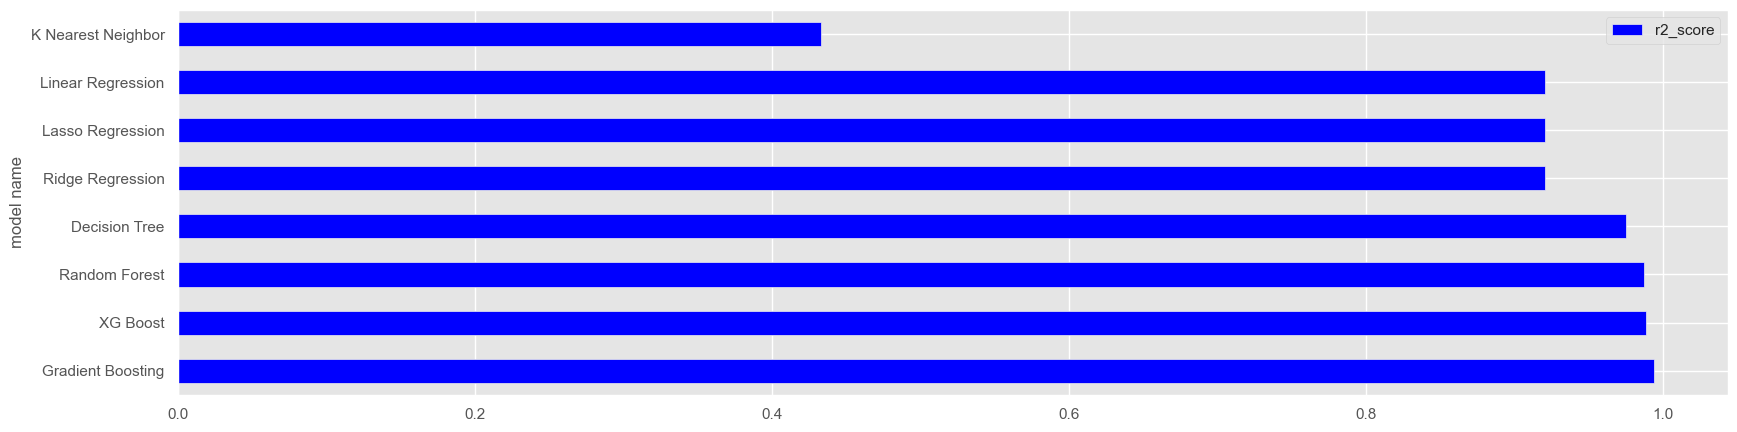

In [100]:
figsize(20,5)

plt.style.use("ggplot")

model_comparison = pd.DataFrame({"model name":["Linear Regression", "Ridge Regression", "Lasso Regression", "K Nearest Neighbor",
                                              "Decision Tree", "Random Forest", "Gradient Boosting", "XG Boost"],
                                "r2_score": [linearr2, ridger2, lassor2, knnr2, dtr2, rfr2, gradientr2, xgr2]})
model_comparison = model_comparison.sort_values("r2_score", ascending=False).plot(x="model name", y="r2_score", color="blue", kind="barh")



# K-Fold Cross Validation

In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [102]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=3)

In [103]:
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.91769157, 0.92048494, 0.91856245, 0.91994469, 0.91806085,
       0.9191317 , 0.92274464, 0.92001977, 0.92058992, 0.92053341])

In [104]:
cross_val_score(Ridge(), X, Y, cv=cv)

array([0.9176944 , 0.92047096, 0.91858209, 0.91995068, 0.91805278,
       0.91914014, 0.92274081, 0.92001284, 0.92059203, 0.9205453 ])

In [105]:
cross_val_score(Lasso(), X, Y, cv=cv)

array([0.9176916 , 0.92048492, 0.91856245, 0.91994469, 0.91806083,
       0.91913171, 0.92274458, 0.92001978, 0.92058993, 0.92053345])

In [106]:
cross_val_score(KNeighborsRegressor(), X, Y, cv=cv)

array([0.39967176, 0.41607497, 0.39973185, 0.39439176, 0.41528349,
       0.42169892, 0.42268923, 0.37593412, 0.39504421, 0.39519379])

In [107]:
cross_val_score(DecisionTreeRegressor(), X, Y, cv=cv)

array([0.97205705, 0.97352649, 0.97053644, 0.97417538, 0.97299214,
       0.97346809, 0.97225872, 0.9724939 , 0.97270828, 0.97223502])

In [108]:
cross_val_score(RandomForestRegressor(), X, Y, cv=cv)

array([0.98827803, 0.98816844, 0.98735069, 0.98752145, 0.98796036,
       0.98796859, 0.9878052 , 0.98738508, 0.98698822, 0.98776196])

In [109]:
cross_val_score(GradientBoostingRegressor(), X, Y, cv=cv)

array([0.99005775, 0.98876077, 0.98877775, 0.99041589, 0.98806811,
       0.98948837, 0.99021764, 0.98905283, 0.98833697, 0.98868561])

In [110]:
cross_val_score(xgb.XGBRegressor(), X, Y, cv=cv)

array([0.99311799, 0.9927643 , 0.9925356 , 0.99308971, 0.9921764 ,
       0.99337703, 0.99276843, 0.99302232, 0.99210919, 0.99279365])

# Model Prediction

In [112]:
lr_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([17799377.19933011])

In [123]:
lr_model.coef_

array([ 5.66668468e+05,  1.01973323e+06,  2.88612932e+06, -1.77611541e+06,
       -1.11001391e+06,  4.86178341e+04,  4.99267543e+05,  5.81368149e+05,
       -1.76723646e+04,  1.42756042e+03, -1.56496173e+06,  2.51220458e+05,
        1.74535380e+06])

In [124]:
lr_model.intercept_

-993314.4639053568

In [113]:
rr_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([17798100.12115934])

In [114]:
lasso_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([17799377.13871589])

In [115]:
knn_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([15086556.7])

In [116]:
dt_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([21717770.])

In [117]:
rf_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([21633482.01282051])

In [118]:
gbr_model.predict([[6,0,1,0,0,4,3,4,11,1986,2,1,5]])

array([21731755.81553069])

### Interpretation:-

Here after training all kinds of model we can see that MinMaxScaled or StandardScaled data model doesn't matter make much difference they give very similar results. But we can surely say that GradientBoostingRegressor and XGBRegressor outperformed most of the machine learning model and GradientBoostingRegressor give 0.99693 as R2-score and XGBRegressor gives 0.997693 as R2-score. The results of all the models of the child being trained in this project I mentioned below:

* GradientBoostingRegressor give score of 0.99693 as R2-score.
* XGBRegressor gives score of 0.997693 as R2-score.
* RandomForestRegressor gives score of 0.9867256 as R2-score.
* LinearRegression gives score of 0.923446 as R2-score.
* RidgeRegression gives score of 0.920549 as R2-score.
* LassoRegression gives score of 0.920545 as R2-score.
* KNeighborsRegressor gives score of 0.952777

# Conclusion:
Through this Machine Learning project we can conclude that there are so many aspects of training machine learning model fitst we have to clean the data and try to get all the features in a suitable format. There are many variables and features which which play their part in setting the price of the house in this particular dataset so we have to keep all the columns or features into consideration while training the model we should focus as much as possible an explorer tree data analysis and try to find the pattern in categorical data also any medical data we can find pattern through various Matrix but in categorical data we have to get enough time to find a relation between two variables is that there is no linear relation then we can try to transform the data but here that was not the case after that we encoded our categorical column in order for ordinal data and by one hot encoder for nominal data and removed all the columns which have no relation with target columns. After that it comes the training the machine learning model part and here we train data with as many model as possible and try to get the best possible RS Square score as we can and at the end we finalise a model with highest RS Square score for this data which gave score of more than 99% (99.769% to be exact).